In [ ]:
!wget https://github.com/yildirimozal/Kidney_stone_detection/archive/refs/heads/main.zip

--2023-11-14 14:19:08--  https://github.com/yildirimozal/Kidney_stone_detection/archive/refs/heads/main.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/yildirimozal/Kidney_stone_detection/zip/refs/heads/main [following]
--2023-11-14 14:19:08--  https://codeload.github.com/yildirimozal/Kidney_stone_detection/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 20.29.134.24
Connecting to codeload.github.com (codeload.github.com)|20.29.134.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [       <=>          ] 681.91M  23.3MB/s    in 29s     

2023-11-14 14:19:38 (23.5 MB/s) - ‘main.zip’ saved [715038574]



In [ ]:
!unzip main.zip

In [ ]:
directory_path = '/content/roi_applied_images'

# Use the rm command with the -rf options to remove all files within the directory
!rm -rf "$directory_path"/*

In [ ]:
import cv2
import os

parent_dir = '/content/gdrive/MyDrive/combined_dataset'

output_dir = '/content/gdrive/MyDrive/resized_images/'

target_size = (224, 224)

os.makedirs(output_dir, exist_ok=True)

def process_directory(directory_path):
    for item in os.listdir(directory_path):
        item_path = os.path.join(directory_path, item)

        if os.path.isdir(item_path):
            process_directory(item_path)
        elif item.lower().endswith(('.jpg', '.jpeg', '.png')):
            try:
                image = cv2.imread(item_path)

                if image is None:
                    print(f"Error: Failed to load {item}")
                    continue

                resized_image = cv2.resize(image, target_size)

                relative_path = os.path.relpath(item_path, parent_dir)
                output_path = os.path.join(output_dir, relative_path)
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                cv2.imwrite(output_path, resized_image)

                print(f"Resized {item} to {target_size} and saved to {output_path}")
            except Exception as e:
                print(f"Error processing {item}: {str(e)}")

process_directory(parent_dir)

print("Image resizing complete.")


Streaming output truncated to the last 5000 lines.
Resized Normal_original_1.3.46.670589.33.1.63731012765688096000001.5560812341533531131.png_a60b3b67-b40c-4c2e-9fc0-e862b0d73f80.png to (224, 224) and saved to /content/gdrive/MyDrive/resized_images/Train/Normal/Normal_original_1.3.46.670589.33.1.63731012765688096000001.5560812341533531131.png_a60b3b67-b40c-4c2e-9fc0-e862b0d73f80.png
Resized Normal_original_1.3.46.670589.33.1.63716668417625753100001.4852293740394278498.png_ed11ccbd-b9b6-4e9d-80c5-b2aae62406df.png to (224, 224) and saved to /content/gdrive/MyDrive/resized_images/Train/Normal/Normal_original_1.3.46.670589.33.1.63716668417625753100001.4852293740394278498.png_ed11ccbd-b9b6-4e9d-80c5-b2aae62406df.png
Resized Normal_original_1.3.46.670589.33.1.63735765993856309900001.4845925144524477566.png_7c3814cd-b148-4e92-9786-4e7f75db2d43.png to (224, 224) and saved to /content/gdrive/MyDrive/resized_images/Train/Normal/Normal_original_1.3.46.670589.33.1.63735765993856309900001.484592514

In [ ]:
import cv2
import os

parent_dir = '/content/resized_images/'

output_dir = '/content/roi_applied_images/'

os.makedirs(output_dir, exist_ok=True)

roi_x1, roi_y1 = 100, 100  # Top-left corner
roi_x2, roi_y2 = 700, 700  # Bottom-right corner

def process_directory(directory_path):
    for item in os.listdir(directory_path):
        item_path = os.path.join(directory_path, item)

        if os.path.isdir(item_path):
            process_directory(item_path)
        elif item.lower().endswith(('.jpg', '.jpeg', '.png')):
            try:
                image = cv2.imread(item_path)

                mask = image.copy()
                mask[:] = 0

                cv2.rectangle(mask, (roi_x1, roi_y1), (roi_x2, roi_y2), (255, 255, 255), thickness=cv2.FILLED)

                roi_image = cv2.bitwise_and(image, mask)

                relative_path = os.path.relpath(item_path, parent_dir)
                output_path = os.path.join(output_dir, relative_path)
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                cv2.imwrite(output_path, roi_image)

                print(f"Applied ROI to {item} and saved to {output_path}")
            except Exception as e:
                print(f"Error processing {item}: {str(e)}")

process_directory(parent_dir)

print("ROI application complete.")


Applied ROI to 1.3.46.670589.33.1.63738118018287216800001.5352257038073359206.png and saved to /content/roi_applied_images/Train/Normal/1.3.46.670589.33.1.63738118018287216800001.5352257038073359206.png
Applied ROI to 1.3.46.670589.33.1.63716668417806763400001.4837410976777945180.png and saved to /content/roi_applied_images/Train/Normal/1.3.46.670589.33.1.63716668417806763400001.4837410976777945180.png
Applied ROI to 1.3.46.670589.33.1.63736647049813513600001.4686901714255592152.png and saved to /content/roi_applied_images/Train/Normal/1.3.46.670589.33.1.63736647049813513600001.4686901714255592152.png
Applied ROI to 1.3.46.670589.33.1.63715891211780077600001.5696285058056155182.png and saved to /content/roi_applied_images/Train/Normal/1.3.46.670589.33.1.63715891211780077600001.5696285058056155182.png
Applied ROI to 1.3.46.670589.33.1.63736980428746417400001.5369893332672664726.png and saved to /content/roi_applied_images/Train/Normal/1.3.46.670589.33.1.63736980428746417400001.536989333

In [ ]:
import cv2
import os

root_directory = '/content/roi_applied_images'

output_directory = '/content/cropped_images'

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

for root, dirs, files in os.walk(root_directory):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            image_path = os.path.join(root, file)
            image = cv2.imread(image_path)

            if image is not None:
                cropped_image = image[144:656, 144:656]

                relative_path = os.path.relpath(image_path, root_directory)
                output_path = os.path.join(output_directory, relative_path)

                output_dir = os.path.dirname(output_path)
                if not os.path.exists(output_dir):
                    os.makedirs(output_dir)

                cv2.imwrite(output_path, cropped_image)

print("Cropping and saving complete.")


Cropping and saving complete.


In [ ]:
import os
import cv2

input_dataset_path = '/content/cropped_images'
output_dataset_path = '/content/reduced_images'

if not os.path.exists(output_dataset_path):
    os.makedirs(output_dataset_path)

def apply_gaussian_blur(input_image_path, output_image_path):
    image = cv2.imread(input_image_path)
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    cv2.imwrite(output_image_path, blurred_image)

for root, dirs, files in os.walk(input_dataset_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            input_image_path = os.path.join(root, file)
            relative_path = os.path.relpath(input_image_path, input_dataset_path)
            output_image_path = os.path.join(output_dataset_path, relative_path)
            os.makedirs(os.path.dirname(output_image_path), exist_ok=True)

            apply_gaussian_blur(input_image_path, output_image_path)



In [ ]:
!pip install augmentor

In [ ]:
import Augmentor
import os

input_directory = '/content/reduced_images'

output_directory = '/content/augmented_images'

os.makedirs(output_directory, exist_ok=True)

def augment_images_in_subfolders(input_folder, output_folder):
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif')):
                input_image_path = os.path.join(root, file)
                relative_path = os.path.relpath(input_image_path, input_folder)
                output_image_path = os.path.join(output_folder, relative_path)

                p = Augmentor.Pipeline(source_directory=os.path.dirname(input_image_path), output_directory=os.path.dirname(output_image_path))

                p.rotate(probability=1, max_left_rotation=20, max_right_rotation=20)


                p.flip_left_right(probability=0.5)

                p.rotate90(probability=0.5)

                p.sample(3)

augment_images_in_subfolders(input_directory, output_directory)


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334178220>: 100%|██████████| 3/3 [00:00<00:00,  8.01 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345413C0>: 100%|██████████| 3/3 [00:00<00:00,  7.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334178760>: 100%|██████████| 3/3 [00:00<00:00,  8.23 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334178850>: 100%|██████████| 3/3 [00:00<00:00, 10.55 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334178F10>: 100%|██████████| 3/3 [00:00<00:00,  9.12 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33523C460>: 100%|██████████| 3/3 [00:00<00:00,  8.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341781F0>: 100%|██████████| 3/3 [00:00<00:00,  9.29 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33523D4E0>: 100%|██████████| 3/3 [00:00<00:00,  8.61 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334178850>: 100%|██████████| 3/3 [00:00<00:00, 11.81 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33523EB00>: 100%|██████████| 3/3 [00:00<00:00,  8.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334178A90>: 100%|██████████| 3/3 [00:00<00:00,  7.16 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33523C550>: 100%|██████████| 3/3 [00:00<00:00,  7.91 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33417AA10>: 100%|██████████| 3/3 [00:00<00:00,  8.43 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33450F430>: 100%|██████████| 3/3 [00:00<00:00,  8.17 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33417AD10>: 100%|██████████| 3/3 [00:00<00:00, 10.49 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345FC970>: 100%|██████████| 3/3 [00:00<00:00,  7.47 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345FC640>: 100%|██████████| 3/3 [00:00<00:00,  9.05 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345FCC70>: 100%|██████████| 3/3 [00:00<00:00,  9.51 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341791E0>: 100%|██████████| 3/3 [00:00<00:00, 11.29 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345FC6A0>: 100%|██████████| 3/3 [00:00<00:00, 13.13 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33417ACB0>: 100%|██████████| 3/3 [00:00<00:00, 14.78 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345CC910>: 100%|██████████| 3/3 [00:00<00:00, 15.21 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33417B040>: 100%|██████████| 3/3 [00:00<00:00, 13.44 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345CD000>: 100%|██████████| 3/3 [00:00<00:00, 13.71 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334178730>: 100%|██████████| 3/3 [00:00<00:00, 13.52 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345CCFD0>: 100%|██████████| 3/3 [00:00<00:00, 14.06 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334178730>: 100%|██████████| 3/3 [00:00<00:00, 12.80 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345CC970>: 100%|██████████| 3/3 [00:00<00:00, 15.16 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345FD240>: 100%|██████████| 3/3 [00:00<00:00, 13.89 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345CD5D0>: 100%|██████████| 3/3 [00:00<00:00, 13.37 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341D6E90>: 100%|██████████| 3/3 [00:00<00:00, 14.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345CD060>: 100%|██████████| 3/3 [00:00<00:00, 13.64 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341D4970>: 100%|██████████| 3/3 [00:00<00:00, 14.72 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345CC940>: 100%|██████████| 3/3 [00:00<00:00, 12.48 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341D4FD0>: 100%|██████████| 3/3 [00:00<00:00, 13.48 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341D7430>: 100%|██████████| 3/3 [00:00<00:00, 13.24 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341D53F0>: 100%|██████████| 3/3 [00:00<00:00, 14.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33523DBD0>: 100%|██████████| 3/3 [00:00<00:00, 13.18 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341D53F0>: 100%|██████████| 3/3 [00:00<00:00, 13.17 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33523FBB0>: 100%|██████████| 3/3 [00:00<00:00, 12.71 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341D5DB0>: 100%|██████████| 3/3 [00:00<00:00, 13.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334008BB0>: 100%|██████████| 3/3 [00:00<00:00, 13.01 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341D54E0>: 100%|██████████| 3/3 [00:00<00:00, 14.11 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334009360>: 100%|██████████| 3/3 [00:00<00:00, 14.26 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341D71C0>: 100%|██████████| 3/3 [00:00<00:00, 13.39 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334009330>: 100%|██████████| 3/3 [00:00<00:00, 13.36 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341D71F0>: 100%|██████████| 3/3 [00:00<00:00, 13.73 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334008160>: 100%|██████████| 3/3 [00:00<00:00, 13.74 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341D6500>: 100%|██████████| 3/3 [00:00<00:00, 13.63 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334008AF0>: 100%|██████████| 3/3 [00:00<00:00, 13.16 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334540BE0>: 100%|██████████| 3/3 [00:00<00:00, 13.80 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334009600>: 100%|██████████| 3/3 [00:00<00:00, 14.63 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334540EB0>: 100%|██████████| 3/3 [00:00<00:00, 13.37 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340095A0>: 100%|██████████| 3/3 [00:00<00:00,  9.88 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334542A10>: 100%|██████████| 3/3 [00:00<00:00,  8.71 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33400A5C0>: 100%|██████████| 3/3 [00:00<00:00,  8.82 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341E84F0>: 100%|██████████| 3/3 [00:00<00:00,  7.87 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334009480>: 100%|██████████| 3/3 [00:00<00:00,  8.44 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341E9810>: 100%|██████████| 3/3 [00:00<00:00,  7.84 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33400B3A0>: 100%|██████████| 3/3 [00:00<00:00,  7.85 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345F48B0>: 100%|██████████| 3/3 [00:00<00:00,  9.27 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33400A740>: 100%|██████████| 3/3 [00:00<00:00,  8.61 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345F56F0>: 100%|██████████| 3/3 [00:00<00:00,  9.08 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33400AE60>: 100%|██████████| 3/3 [00:00<00:00,  8.30 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345F6B90>: 100%|██████████| 3/3 [00:00<00:00, 10.87 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341E9240>: 100%|██████████| 3/3 [00:00<00:00,  8.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345F76D0>: 100%|██████████| 3/3 [00:00<00:00, 10.08 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341E9CC0>: 100%|██████████| 3/3 [00:00<00:00,  9.06 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341E9750>: 100%|██████████| 3/3 [00:00<00:00, 10.65 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341E8AF0>: 100%|██████████| 3/3 [00:00<00:00,  8.04 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341EA290>: 100%|██████████| 3/3 [00:00<00:00,  7.84 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33417AD10>: 100%|██████████| 3/3 [00:00<00:00,  8.34 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341EA8F0>: 100%|██████████| 3/3 [00:00<00:00,  8.52 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33417A4D0>: 100%|██████████| 3/3 [00:00<00:00, 10.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341EB910>: 100%|██████████| 3/3 [00:00<00:00, 12.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341F5930>: 100%|██████████| 3/3 [00:00<00:00, 12.96 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33417B940>: 100%|██████████| 3/3 [00:00<00:00, 13.09 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341F5540>: 100%|██████████| 3/3 [00:00<00:00, 13.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345CD090>: 100%|██████████| 3/3 [00:00<00:00, 12.89 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341F6470>: 100%|██████████| 3/3 [00:00<00:00, 13.68 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345CDD20>: 100%|██████████| 3/3 [00:00<00:00, 13.29 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341F6140>: 100%|██████████| 3/3 [00:00<00:00, 13.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345CE170>: 100%|██████████| 3/3 [00:00<00:00, 12.96 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341F75B0>: 100%|██████████| 3/3 [00:00<00:00, 14.09 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345CDDB0>: 100%|██████████| 3/3 [00:00<00:00, 13.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341D5B40>: 100%|██████████| 3/3 [00:00<00:00, 13.92 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345CEE00>: 100%|██████████| 3/3 [00:00<00:00, 13.76 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33413B130>: 100%|██████████| 3/3 [00:00<00:00, 14.60 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345CED10>: 100%|██████████| 3/3 [00:00<00:00, 14.17 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341F7F40>: 100%|██████████| 3/3 [00:00<00:00, 14.96 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345CEC50>: 100%|██████████| 3/3 [00:00<00:00, 11.79 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33419CA30>: 100%|██████████| 3/3 [00:00<00:00, 13.01 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345CDD20>: 100%|██████████| 3/3 [00:00<00:00, 13.56 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341F4D90>: 100%|██████████| 3/3 [00:00<00:00, 13.64 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345CFA60>: 100%|██████████| 3/3 [00:00<00:00, 15.07 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33419CBE0>: 100%|██████████| 3/3 [00:00<00:00, 13.88 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345CFDF0>: 100%|██████████| 3/3 [00:00<00:00, 13.76 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33419E770>: 100%|██████████| 3/3 [00:00<00:00, 13.92 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33523EEF0>: 100%|██████████| 3/3 [00:00<00:00, 13.65 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33419DD80>: 100%|██████████| 3/3 [00:00<00:00, 14.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345FF250>: 100%|██████████| 3/3 [00:00<00:00, 13.28 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33419FCA0>: 100%|██████████| 3/3 [00:00<00:00, 14.41 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334008070>: 100%|██████████| 3/3 [00:00<00:00, 13.30 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341E9F00>: 100%|██████████| 3/3 [00:00<00:00, 14.11 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341F4B80>: 100%|██████████| 3/3 [00:00<00:00, 13.39 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341EBEB0>: 100%|██████████| 3/3 [00:00<00:00, 15.28 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341F49A0>: 100%|██████████| 3/3 [00:00<00:00, 16.82 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341EB280>: 100%|██████████| 3/3 [00:00<00:00, 13.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341F7640>: 100%|██████████| 3/3 [00:00<00:00, 13.43 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341EB3A0>: 100%|██████████| 3/3 [00:00<00:00,  8.85 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341F4970>: 100%|██████████| 3/3 [00:00<00:00,  7.12 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33406F940>: 100%|██████████| 3/3 [00:00<00:00,  7.76 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341F6F80>: 100%|██████████| 3/3 [00:00<00:00, 10.18 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33406C970>: 100%|██████████| 3/3 [00:00<00:00,  9.15 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341F73A0>: 100%|██████████| 3/3 [00:00<00:00,  8.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33406D0F0>: 100%|██████████| 3/3 [00:00<00:00,  7.79 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345CFE50>: 100%|██████████| 3/3 [00:00<00:00,  9.45 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33406E6B0>: 100%|██████████| 3/3 [00:00<00:00,  7.71 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33419C400>: 100%|██████████| 3/3 [00:00<00:00,  8.65 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33406F040>: 100%|██████████| 3/3 [00:00<00:00,  8.65 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33419DC00>: 100%|██████████| 3/3 [00:00<00:00,  8.15 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33406CA60>: 100%|██████████| 3/3 [00:00<00:00,  9.63 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33419DB10>: 100%|██████████| 3/3 [00:00<00:00,  8.97 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341D7D00>: 100%|██████████| 3/3 [00:00<00:00,  7.90 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33419F070>: 100%|██████████| 3/3 [00:00<00:00,  8.39 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341D5390>: 100%|██████████| 3/3 [00:00<00:00,  8.89 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33400B040>: 100%|██████████| 3/3 [00:00<00:00,  7.85 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345F4D00>: 100%|██████████| 3/3 [00:00<00:00,  9.39 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33419F6D0>: 100%|██████████| 3/3 [00:00<00:00,  8.92 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345F5420>: 100%|██████████| 3/3 [00:00<00:00, 10.81 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33405C9A0>: 100%|██████████| 3/3 [00:00<00:00, 13.08 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345F5330>: 100%|██████████| 3/3 [00:00<00:00, 13.91 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33405CB50>: 100%|██████████| 3/3 [00:00<00:00, 12.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345F6560>: 100%|██████████| 3/3 [00:00<00:00, 13.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33405DB40>: 100%|██████████| 3/3 [00:00<00:00, 13.60 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345F6830>: 100%|██████████| 3/3 [00:00<00:00, 12.99 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33405EBF0>: 100%|██████████| 3/3 [00:00<00:00, 13.87 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345F73D0>: 100%|██████████| 3/3 [00:00<00:00, 14.80 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33405F7F0>: 100%|██████████| 3/3 [00:00<00:00, 13.96 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33405E320>: 100%|██████████| 3/3 [00:00<00:00, 12.69 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334032C80>: 100%|██████████| 3/3 [00:00<00:00, 13.60 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33405C4F0>: 100%|██████████| 3/3 [00:00<00:00, 13.76 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334030070>: 100%|██████████| 3/3 [00:00<00:00, 12.81 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345F6F80>: 100%|██████████| 3/3 [00:00<00:00, 16.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334031660>: 100%|██████████| 3/3 [00:00<00:00, 13.69 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33405C5E0>: 100%|██████████| 3/3 [00:00<00:00, 13.30 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334032290>: 100%|██████████| 3/3 [00:00<00:00, 12.39 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33405D7B0>: 100%|██████████| 3/3 [00:00<00:00, 14.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334032B00>: 100%|██████████| 3/3 [00:00<00:00, 13.01 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345F6D70>: 100%|██████████| 3/3 [00:00<00:00, 13.20 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334033640>: 100%|██████████| 3/3 [00:00<00:00, 12.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340319C0>: 100%|██████████| 3/3 [00:00<00:00, 14.08 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334031840>: 100%|██████████| 3/3 [00:00<00:00, 13.49 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33413B310>: 100%|██████████| 3/3 [00:00<00:00, 13.81 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334032DD0>: 100%|██████████| 3/3 [00:00<00:00, 13.73 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3345F5CC0>: 100%|██████████| 3/3 [00:00<00:00, 13.20 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33419E320>: 100%|██████████| 3/3 [00:00<00:00, 12.84 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33417A4D0>: 100%|██████████| 3/3 [00:00<00:00, 13.97 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33406FEB0>: 100%|██████████| 3/3 [00:00<00:00, 14.71 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341F71F0>: 100%|██████████| 3/3 [00:00<00:00, 13.17 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33406C3A0>: 100%|██████████| 3/3 [00:00<00:00, 14.67 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341F58D0>: 100%|██████████| 3/3 [00:00<00:00, 13.05 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33406CDC0>: 100%|██████████| 3/3 [00:00<00:00, 13.14 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340A0F40>: 100%|██████████| 3/3 [00:00<00:00, 13.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341D7700>: 100%|██████████| 3/3 [00:00<00:00,  8.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340A22F0>: 100%|██████████| 3/3 [00:00<00:00,  7.20 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340451B0>: 100%|██████████| 3/3 [00:00<00:00,  8.40 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340A2440>: 100%|██████████| 3/3 [00:00<00:00,  8.15 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334045F30>: 100%|██████████| 3/3 [00:00<00:00,  8.54 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340A2680>: 100%|██████████| 3/3 [00:00<00:00,  8.37 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334046710>: 100%|██████████| 3/3 [00:00<00:00,  9.18 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340A3BB0>: 100%|██████████| 3/3 [00:00<00:00,  8.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334046890>: 100%|██████████| 3/3 [00:00<00:00,  9.16 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334046140>: 100%|██████████| 3/3 [00:00<00:00,  9.27 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341E9F60>: 100%|██████████| 3/3 [00:00<00:00,  9.71 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334044B50>: 100%|██████████| 3/3 [00:00<00:00,  8.54 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341EAF50>: 100%|██████████| 3/3 [00:00<00:00,  7.89 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340442E0>: 100%|██████████| 3/3 [00:00<00:00,  8.84 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340E9180>: 100%|██████████| 3/3 [00:00<00:00,  7.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334046410>: 100%|██████████| 3/3 [00:00<00:00,  7.42 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340EBBB0>: 100%|██████████| 3/3 [00:00<00:00,  7.65 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334046EC0>: 100%|██████████| 3/3 [00:00<00:00,  7.87 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340E9120>: 100%|██████████| 3/3 [00:00<00:00,  8.64 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340A39A0>: 100%|██████████| 3/3 [00:00<00:00,  9.35 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340EA680>: 100%|██████████| 3/3 [00:00<00:00, 11.55 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334044D00>: 100%|██████████| 3/3 [00:00<00:00, 13.41 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340E8AC0>: 100%|██████████| 3/3 [00:00<00:00, 13.55 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33401C460>: 100%|██████████| 3/3 [00:00<00:00, 15.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33406C2E0>: 100%|██████████| 3/3 [00:00<00:00, 13.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334047670>: 100%|██████████| 3/3 [00:00<00:00, 13.57 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33406D870>: 100%|██████████| 3/3 [00:00<00:00, 13.11 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33401CE50>: 100%|██████████| 3/3 [00:00<00:00, 13.23 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33406F700>: 100%|██████████| 3/3 [00:00<00:00, 13.69 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33401C1F0>: 100%|██████████| 3/3 [00:00<00:00, 13.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33406EC80>: 100%|██████████| 3/3 [00:00<00:00, 12.94 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33401CDF0>: 100%|██████████| 3/3 [00:00<00:00, 13.81 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33406EE60>: 100%|██████████| 3/3 [00:00<00:00, 13.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33401C040>: 100%|██████████| 3/3 [00:00<00:00, 12.71 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33400BEB0>: 100%|██████████| 3/3 [00:00<00:00, 12.49 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33401ED70>: 100%|██████████| 3/3 [00:00<00:00, 13.94 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341D6020>: 100%|██████████| 3/3 [00:00<00:00, 13.03 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33401FD30>: 100%|██████████| 3/3 [00:00<00:00, 15.40 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341D6500>: 100%|██████████| 3/3 [00:00<00:00, 13.35 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33406CC70>: 100%|██████████| 3/3 [00:00<00:00, 13.54 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340A0C70>: 100%|██████████| 3/3 [00:00<00:00, 12.99 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33405CF40>: 100%|██████████| 3/3 [00:00<00:00, 13.61 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340A0100>: 100%|██████████| 3/3 [00:00<00:00, 13.20 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33405C5E0>: 100%|██████████| 3/3 [00:00<00:00, 13.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340A15A0>: 100%|██████████| 3/3 [00:00<00:00, 13.39 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33405F4C0>: 100%|██████████| 3/3 [00:00<00:00, 11.51 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340A2EC0>: 100%|██████████| 3/3 [00:00<00:00, 13.20 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33405FFD0>: 100%|██████████| 3/3 [00:00<00:00, 13.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340A2BC0>: 100%|██████████| 3/3 [00:00<00:00, 13.34 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334030190>: 100%|██████████| 3/3 [00:00<00:00, 12.84 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340A20B0>: 100%|██████████| 3/3 [00:00<00:00, 12.79 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334031BD0>: 100%|██████████| 3/3 [00:00<00:00, 13.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340A3BE0>: 100%|██████████| 3/3 [00:00<00:00, 13.40 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334033F10>: 100%|██████████| 3/3 [00:00<00:00, 13.20 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340E8490>: 100%|██████████| 3/3 [00:00<00:00, 10.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334031060>: 100%|██████████| 3/3 [00:00<00:00,  7.72 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340EB2E0>: 100%|██████████| 3/3 [00:00<00:00,  8.03 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334030A90>: 100%|██████████| 3/3 [00:00<00:00,  7.82 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340EB4F0>: 100%|██████████| 3/3 [00:00<00:00,  8.80 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334033130>: 100%|██████████| 3/3 [00:00<00:00,  7.72 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341D6500>: 100%|██████████| 3/3 [00:00<00:00,  8.11 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334033BB0>: 100%|██████████| 3/3 [00:00<00:00,  8.54 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33401D270>: 100%|██████████| 3/3 [00:00<00:00,  8.68 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340E9A20>: 100%|██████████| 3/3 [00:00<00:00,  8.33 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33401D0F0>: 100%|██████████| 3/3 [00:00<00:00,  9.15 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340E99F0>: 100%|██████████| 3/3 [00:00<00:00,  9.31 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33401E680>: 100%|██████████| 3/3 [00:00<00:00,  7.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340E80D0>: 100%|██████████| 3/3 [00:00<00:00,  8.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33401EE00>: 100%|██████████| 3/3 [00:00<00:00,  9.44 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340EB700>: 100%|██████████| 3/3 [00:00<00:00,  8.44 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33401EE00>: 100%|██████████| 3/3 [00:00<00:00,  7.91 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340780A0>: 100%|██████████| 3/3 [00:00<00:00,  8.71 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33401FBB0>: 100%|██████████| 3/3 [00:00<00:00,  9.89 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340794B0>: 100%|██████████| 3/3 [00:00<00:00,  9.66 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340D41F0>: 100%|██████████| 3/3 [00:00<00:00,  9.05 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334078AC0>: 100%|██████████| 3/3 [00:00<00:00, 12.82 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340D4D00>: 100%|██████████| 3/3 [00:00<00:00, 15.31 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33407B3A0>: 100%|██████████| 3/3 [00:00<00:00, 13.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340D60B0>: 100%|██████████| 3/3 [00:00<00:00, 13.24 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334079510>: 100%|██████████| 3/3 [00:00<00:00, 13.75 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340D4220>: 100%|██████████| 3/3 [00:00<00:00, 13.30 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33407AF80>: 100%|██████████| 3/3 [00:00<00:00, 15.14 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340D7D30>: 100%|██████████| 3/3 [00:00<00:00, 12.74 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340D7820>: 100%|██████████| 3/3 [00:00<00:00, 13.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340D68C0>: 100%|██████████| 3/3 [00:00<00:00, 14.76 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340F8280>: 100%|██████████| 3/3 [00:00<00:00, 13.30 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340F9DB0>: 100%|██████████| 3/3 [00:00<00:00, 13.47 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340F8130>: 100%|██████████| 3/3 [00:00<00:00, 13.57 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340F87C0>: 100%|██████████| 3/3 [00:00<00:00, 13.81 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340FAA70>: 100%|██████████| 3/3 [00:00<00:00, 14.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340FA590>: 100%|██████████| 3/3 [00:00<00:00, 13.29 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340F97B0>: 100%|██████████| 3/3 [00:00<00:00, 12.97 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340FB0A0>: 100%|██████████| 3/3 [00:00<00:00, 13.14 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340FA290>: 100%|██████████| 3/3 [00:00<00:00, 15.05 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340FB9D0>: 100%|██████████| 3/3 [00:00<00:00, 13.33 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340FA410>: 100%|██████████| 3/3 [00:00<00:00, 12.68 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340FBB80>: 100%|██████████| 3/3 [00:00<00:00, 13.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340FB880>: 100%|██████████| 3/3 [00:00<00:00, 13.94 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340F92A0>: 100%|██████████| 3/3 [00:00<00:00, 13.30 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340FBF70>: 100%|██████████| 3/3 [00:00<00:00, 12.85 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33401D750>: 100%|██████████| 3/3 [00:00<00:00, 12.92 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340A3250>: 100%|██████████| 3/3 [00:00<00:00, 12.34 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334059990>: 100%|██████████| 3/3 [00:00<00:00, 12.52 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33406E080>: 100%|██████████| 3/3 [00:00<00:00, 14.79 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33405A410>: 100%|██████████| 3/3 [00:00<00:00, 13.67 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334079180>: 100%|██████████| 3/3 [00:00<00:00, 13.67 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33405AE90>: 100%|██████████| 3/3 [00:00<00:00, 13.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334031CC0>: 100%|██████████| 3/3 [00:00<00:00, 13.66 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33405B970>: 100%|██████████| 3/3 [00:00<00:00, 10.41 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340D4E80>: 100%|██████████| 3/3 [00:00<00:00,  8.31 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33407BBB0>: 100%|██████████| 3/3 [00:00<00:00,  7.96 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340D5090>: 100%|██████████| 3/3 [00:00<00:00,  9.01 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340783A0>: 100%|██████████| 3/3 [00:00<00:00,  7.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340D4610>: 100%|██████████| 3/3 [00:00<00:00,  8.40 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334078550>: 100%|██████████| 3/3 [00:00<00:00,  8.37 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340D64D0>: 100%|██████████| 3/3 [00:00<00:00,  9.41 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334079A80>: 100%|██████████| 3/3 [00:00<00:00,  7.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340D78B0>: 100%|██████████| 3/3 [00:00<00:00,  8.43 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33407B760>: 100%|██████████| 3/3 [00:00<00:00,  8.91 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340F6CE0>: 100%|██████████| 3/3 [00:00<00:00,  8.63 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33407BEE0>: 100%|██████████| 3/3 [00:00<00:00,  8.34 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340F4640>: 100%|██████████| 3/3 [00:00<00:00,  8.18 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340E88B0>: 100%|██████████| 3/3 [00:00<00:00,  8.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340F5330>: 100%|██████████| 3/3 [00:00<00:00,  9.69 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340E8070>: 100%|██████████| 3/3 [00:00<00:00,  7.61 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340F69E0>: 100%|██████████| 3/3 [00:00<00:00,  8.63 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340D4C40>: 100%|██████████| 3/3 [00:00<00:00,  8.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340F70D0>: 100%|██████████| 3/3 [00:00<00:00,  9.01 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340D5630>: 100%|██████████| 3/3 [00:00<00:00,  8.24 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340F6E30>: 100%|██████████| 3/3 [00:00<00:00, 11.69 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340D7670>: 100%|██████████| 3/3 [00:00<00:00, 13.52 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B414E20>: 100%|██████████| 3/3 [00:00<00:00, 12.80 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340D76D0>: 100%|██████████| 3/3 [00:00<00:00, 12.77 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340F6BF0>: 100%|██████████| 3/3 [00:00<00:00, 12.08 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340F6470>: 100%|██████████| 3/3 [00:00<00:00, 12.18 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4164D0>: 100%|██████████| 3/3 [00:00<00:00, 12.08 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340F4100>: 100%|██████████| 3/3 [00:00<00:00, 13.75 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B415840>: 100%|██████████| 3/3 [00:00<00:00, 12.77 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340F6DD0>: 100%|██████████| 3/3 [00:00<00:00, 12.82 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33405CFA0>: 100%|██████████| 3/3 [00:00<00:00, 13.97 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340F6170>: 100%|██████████| 3/3 [00:00<00:00, 14.82 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4080D0>: 100%|██████████| 3/3 [00:00<00:00, 12.64 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340F7610>: 100%|██████████| 3/3 [00:00<00:00, 13.20 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B408DF0>: 100%|██████████| 3/3 [00:00<00:00, 13.11 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B414760>: 100%|██████████| 3/3 [00:00<00:00, 12.90 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4098A0>: 100%|██████████| 3/3 [00:00<00:00, 13.07 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B414310>: 100%|██████████| 3/3 [00:00<00:00, 13.11 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B408430>: 100%|██████████| 3/3 [00:00<00:00, 13.33 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340F5630>: 100%|██████████| 3/3 [00:00<00:00, 12.57 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B40B490>: 100%|██████████| 3/3 [00:00<00:00, 13.39 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B415E70>: 100%|██████████| 3/3 [00:00<00:00, 14.18 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B40B9D0>: 100%|██████████| 3/3 [00:00<00:00, 12.44 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B416830>: 100%|██████████| 3/3 [00:00<00:00, 12.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33407B700>: 100%|██████████| 3/3 [00:00<00:00, 12.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B416890>: 100%|██████████| 3/3 [00:00<00:00, 13.06 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33407BEE0>: 100%|██████████| 3/3 [00:00<00:00, 12.81 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B415ED0>: 100%|██████████| 3/3 [00:00<00:00, 12.67 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334079090>: 100%|██████████| 3/3 [00:00<00:00, 12.63 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340F7850>: 100%|██████████| 3/3 [00:00<00:00, 12.01 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341D6500>: 100%|██████████| 3/3 [00:00<00:00, 13.72 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B417F70>: 100%|██████████| 3/3 [00:00<00:00, 12.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334058880>: 100%|██████████| 3/3 [00:00<00:00, 13.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B444BE0>: 100%|██████████| 3/3 [00:00<00:00,  8.45 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340592A0>: 100%|██████████| 3/3 [00:00<00:00,  8.35 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B445990>: 100%|██████████| 3/3 [00:00<00:00,  8.47 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B40BCA0>: 100%|██████████| 3/3 [00:00<00:00,  8.68 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B445FC0>: 100%|██████████| 3/3 [00:00<00:00,  7.33 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33405AAA0>: 100%|██████████| 3/3 [00:00<00:00,  7.14 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340586D0>: 100%|██████████| 3/3 [00:00<00:00,  9.61 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33405B580>: 100%|██████████| 3/3 [00:00<00:00,  8.59 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4413F0>: 100%|██████████| 3/3 [00:00<00:00,  8.71 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B446410>: 100%|██████████| 3/3 [00:00<00:00, 10.38 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B440A00>: 100%|██████████| 3/3 [00:00<00:00,  9.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B445B70>: 100%|██████████| 3/3 [00:00<00:00,  8.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4416C0>: 100%|██████████| 3/3 [00:00<00:00,  8.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4464D0>: 100%|██████████| 3/3 [00:00<00:00,  8.15 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B440B50>: 100%|██████████| 3/3 [00:00<00:00,  7.88 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B445FC0>: 100%|██████████| 3/3 [00:00<00:00,  7.76 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B441D20>: 100%|██████████| 3/3 [00:00<00:00,  8.24 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B40DFF0>: 100%|██████████| 3/3 [00:00<00:00,  7.19 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334078430>: 100%|██████████| 3/3 [00:00<00:00,  8.83 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B40E1D0>: 100%|██████████| 3/3 [00:00<00:00,  9.43 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B443460>: 100%|██████████| 3/3 [00:00<00:00,  8.74 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B40E9E0>: 100%|██████████| 3/3 [00:00<00:00,  9.35 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B40CFA0>: 100%|██████████| 3/3 [00:00<00:00, 11.43 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B40FF40>: 100%|██████████| 3/3 [00:00<00:00, 12.87 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B40D030>: 100%|██████████| 3/3 [00:00<00:00, 12.61 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B40CE80>: 100%|██████████| 3/3 [00:00<00:00, 13.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B40D4B0>: 100%|██████████| 3/3 [00:00<00:00, 13.34 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3E0A30>: 100%|██████████| 3/3 [00:00<00:00, 12.99 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340EBCA0>: 100%|██████████| 3/3 [00:00<00:00, 13.88 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3E0BE0>: 100%|██████████| 3/3 [00:00<00:00, 12.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B446BF0>: 100%|██████████| 3/3 [00:00<00:00, 13.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3E1990>: 100%|██████████| 3/3 [00:00<00:00, 13.13 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33406F520>: 100%|██████████| 3/3 [00:00<00:00, 12.43 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B40E1D0>: 100%|██████████| 3/3 [00:00<00:00, 12.37 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33401D330>: 100%|██████████| 3/3 [00:00<00:00, 15.36 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3E0070>: 100%|██████████| 3/3 [00:00<00:00, 13.37 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3F0C40>: 100%|██████████| 3/3 [00:00<00:00, 11.92 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3E0B20>: 100%|██████████| 3/3 [00:00<00:00, 12.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3F02E0>: 100%|██████████| 3/3 [00:00<00:00, 13.44 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3E1450>: 100%|██████████| 3/3 [00:00<00:00, 12.74 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3F0AF0>: 100%|██████████| 3/3 [00:00<00:00, 13.47 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3E2920>: 100%|██████████| 3/3 [00:00<00:00, 13.51 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3F1780>: 100%|██████████| 3/3 [00:00<00:00, 12.05 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3E27A0>: 100%|██████████| 3/3 [00:00<00:00, 13.24 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3F20B0>: 100%|██████████| 3/3 [00:00<00:00, 12.80 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3E3E20>: 100%|██████████| 3/3 [00:00<00:00, 12.71 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3F34C0>: 100%|██████████| 3/3 [00:00<00:00, 14.71 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340586D0>: 100%|██████████| 3/3 [00:00<00:00, 12.97 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3F20B0>: 100%|██████████| 3/3 [00:00<00:00, 12.61 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33405B4F0>: 100%|██████████| 3/3 [00:00<00:00, 12.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3E0580>: 100%|██████████| 3/3 [00:00<00:00, 12.85 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33405BB50>: 100%|██████████| 3/3 [00:00<00:00, 13.39 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3E1030>: 100%|██████████| 3/3 [00:00<00:00, 11.91 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B440580>: 100%|██████████| 3/3 [00:00<00:00, 13.48 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3E2290>: 100%|██████████| 3/3 [00:00<00:00, 11.97 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4473D0>: 100%|██████████| 3/3 [00:00<00:00,  9.56 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3E2DD0>: 100%|██████████| 3/3 [00:00<00:00,  7.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341D73D0>: 100%|██████████| 3/3 [00:00<00:00,  8.16 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3E39D0>: 100%|██████████| 3/3 [00:00<00:00,  8.64 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3F0880>: 100%|██████████| 3/3 [00:00<00:00,  9.01 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B40EB00>: 100%|██████████| 3/3 [00:00<00:00,  7.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3F1360>: 100%|██████████| 3/3 [00:00<00:00,  7.56 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B40D180>: 100%|██████████| 3/3 [00:00<00:00,  8.21 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3F07F0>: 100%|██████████| 3/3 [00:00<00:00,  8.35 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B40EFB0>: 100%|██████████| 3/3 [00:00<00:00,  9.59 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3F2E00>: 100%|██████████| 3/3 [00:00<00:00,  9.38 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B40E020>: 100%|██████████| 3/3 [00:00<00:00,  8.36 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3F3280>: 100%|██████████| 3/3 [00:00<00:00,  6.81 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B40FD30>: 100%|██████████| 3/3 [00:00<00:00,  7.57 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3F24D0>: 100%|██████████| 3/3 [00:00<00:00,  7.97 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA33406F520>: 100%|██████████| 3/3 [00:00<00:00,  9.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3B61A0>: 100%|██████████| 3/3 [00:00<00:00,  7.35 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B408FA0>: 100%|██████████| 3/3 [00:00<00:00,  8.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3B47F0>: 100%|██████████| 3/3 [00:00<00:00,  9.72 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4088B0>: 100%|██████████| 3/3 [00:00<00:00,  8.76 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3B5270>: 100%|██████████| 3/3 [00:00<00:00,  9.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B40AF80>: 100%|██████████| 3/3 [00:00<00:00, 12.82 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3B6470>: 100%|██████████| 3/3 [00:00<00:00, 13.06 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B408610>: 100%|██████████| 3/3 [00:00<00:00, 12.38 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3B6500>: 100%|██████████| 3/3 [00:00<00:00, 14.14 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B40A6B0>: 100%|██████████| 3/3 [00:00<00:00, 13.04 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3B5B40>: 100%|██████████| 3/3 [00:00<00:00, 13.47 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B40A4D0>: 100%|██████████| 3/3 [00:00<00:00, 13.36 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3B4760>: 100%|██████████| 3/3 [00:00<00:00, 11.96 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B40B1F0>: 100%|██████████| 3/3 [00:00<00:00, 13.01 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3B60E0>: 100%|██████████| 3/3 [00:00<00:00, 12.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340D7250>: 100%|██████████| 3/3 [00:00<00:00, 13.28 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B480400>: 100%|██████████| 3/3 [00:00<00:00, 13.54 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B480C70>: 100%|██████████| 3/3 [00:00<00:00, 12.44 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3B5BA0>: 100%|██████████| 3/3 [00:00<00:00, 13.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B481870>: 100%|██████████| 3/3 [00:00<00:00, 13.13 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4813F0>: 100%|██████████| 3/3 [00:00<00:00, 12.34 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B482440>: 100%|██████████| 3/3 [00:00<00:00, 13.36 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B481C00>: 100%|██████████| 3/3 [00:00<00:00, 12.68 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B481FC0>: 100%|██████████| 3/3 [00:00<00:00, 12.74 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4818A0>: 100%|██████████| 3/3 [00:00<00:00, 12.23 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B481960>: 100%|██████████| 3/3 [00:00<00:00, 13.15 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B483310>: 100%|██████████| 3/3 [00:00<00:00, 14.48 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B482440>: 100%|██████████| 3/3 [00:00<00:00, 12.26 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B483B20>: 100%|██████████| 3/3 [00:00<00:00, 15.68 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4475E0>: 100%|██████████| 3/3 [00:00<00:00, 12.85 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B483B20>: 100%|██████████| 3/3 [00:00<00:00, 12.54 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B408880>: 100%|██████████| 3/3 [00:00<00:00, 13.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4411E0>: 100%|██████████| 3/3 [00:00<00:00, 13.31 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B478910>: 100%|██████████| 3/3 [00:00<00:00, 12.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B441CC0>: 100%|██████████| 3/3 [00:00<00:00, 12.77 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B479480>: 100%|██████████| 3/3 [00:00<00:00, 12.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B441090>: 100%|██████████| 3/3 [00:00<00:00, 12.65 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B47A740>: 100%|██████████| 3/3 [00:00<00:00,  8.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B443730>: 100%|██████████| 3/3 [00:00<00:00,  8.60 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B47AAD0>: 100%|██████████| 3/3 [00:00<00:00,  8.05 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4785B0>: 100%|██████████| 3/3 [00:00<00:00,  9.01 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3341D7EB0>: 100%|██████████| 3/3 [00:00<00:00,  9.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4791B0>: 100%|██████████| 3/3 [00:00<00:00, 10.16 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3B4130>: 100%|██████████| 3/3 [00:00<00:00,  7.66 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B47A200>: 100%|██████████| 3/3 [00:00<00:00,  8.12 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3B4D00>: 100%|██████████| 3/3 [00:00<00:00,  7.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B47AE60>: 100%|██████████| 3/3 [00:00<00:00,  8.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3B56C0>: 100%|██████████| 3/3 [00:00<00:00,  8.49 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B47B790>: 100%|██████████| 3/3 [00:00<00:00,  9.80 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3B7F40>: 100%|██████████| 3/3 [00:00<00:00,  9.23 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B47ACB0>: 100%|██████████| 3/3 [00:00<00:00,  7.80 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B483C70>: 100%|██████████| 3/3 [00:00<00:00,  8.27 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B499CC0>: 100%|██████████| 3/3 [00:00<00:00,  7.51 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4AF0A0>: 100%|██████████| 3/3 [00:00<00:00, 10.16 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B499420>: 100%|██████████| 3/3 [00:00<00:00,  7.87 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4AD420>: 100%|██████████| 3/3 [00:00<00:00,  8.35 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B499EA0>: 100%|██████████| 3/3 [00:00<00:00,  7.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4AE4D0>: 100%|██████████| 3/3 [00:00<00:00,  8.37 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B49A9B0>: 100%|██████████| 3/3 [00:00<00:00,  8.78 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4AF8E0>: 100%|██████████| 3/3 [00:00<00:00, 10.00 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B49B4C0>: 100%|██████████| 3/3 [00:00<00:00, 14.44 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328548A00>: 100%|██████████| 3/3 [00:00<00:00, 12.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328549900>: 100%|██████████| 3/3 [00:00<00:00, 12.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328548C70>: 100%|██████████| 3/3 [00:00<00:00, 13.55 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854A500>: 100%|██████████| 3/3 [00:00<00:00, 11.91 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328549750>: 100%|██████████| 3/3 [00:00<00:00, 13.01 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854A380>: 100%|██████████| 3/3 [00:00<00:00, 12.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285495D0>: 100%|██████████| 3/3 [00:00<00:00, 13.33 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4ACAF0>: 100%|██████████| 3/3 [00:00<00:00, 12.84 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328549C30>: 100%|██████████| 3/3 [00:00<00:00, 12.30 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4AE5F0>: 100%|██████████| 3/3 [00:00<00:00, 13.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328549E40>: 100%|██████████| 3/3 [00:00<00:00, 12.87 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4ACB20>: 100%|██████████| 3/3 [00:00<00:00, 12.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328549450>: 100%|██████████| 3/3 [00:00<00:00, 12.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4AD690>: 100%|██████████| 3/3 [00:00<00:00, 13.60 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285496F0>: 100%|██████████| 3/3 [00:00<00:00, 13.41 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4AC190>: 100%|██████████| 3/3 [00:00<00:00, 12.72 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328548400>: 100%|██████████| 3/3 [00:00<00:00, 13.80 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4AFDF0>: 100%|██████████| 3/3 [00:00<00:00, 12.91 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854B400>: 100%|██████████| 3/3 [00:00<00:00, 12.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4AEAA0>: 100%|██████████| 3/3 [00:00<00:00, 13.76 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854B340>: 100%|██████████| 3/3 [00:00<00:00, 13.26 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4AE920>: 100%|██████████| 3/3 [00:00<00:00, 12.99 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854B4F0>: 100%|██████████| 3/3 [00:00<00:00, 12.39 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4AED40>: 100%|██████████| 3/3 [00:00<00:00, 12.92 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4AEF50>: 100%|██████████| 3/3 [00:00<00:00, 13.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B49BA90>: 100%|██████████| 3/3 [00:00<00:00, 12.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B47A740>: 100%|██████████| 3/3 [00:00<00:00, 12.99 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4AE290>: 100%|██████████| 3/3 [00:00<00:00, 14.92 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B47B550>: 100%|██████████| 3/3 [00:00<00:00, 14.69 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3E1270>: 100%|██████████| 3/3 [00:00<00:00, 13.61 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285151B0>: 100%|██████████| 3/3 [00:00<00:00, 13.12 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4AFFA0>: 100%|██████████| 3/3 [00:00<00:00,  9.05 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328515C30>: 100%|██████████| 3/3 [00:00<00:00,  8.56 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328514400>: 100%|██████████| 3/3 [00:00<00:00,  8.28 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B49B5E0>: 100%|██████████| 3/3 [00:00<00:00,  8.82 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328515690>: 100%|██████████| 3/3 [00:00<00:00,  7.33 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B49A170>: 100%|██████████| 3/3 [00:00<00:00,  8.52 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328516200>: 100%|██████████| 3/3 [00:00<00:00,  9.57 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B49A260>: 100%|██████████| 3/3 [00:00<00:00,  9.87 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285156C0>: 100%|██████████| 3/3 [00:00<00:00,  8.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B49ACE0>: 100%|██████████| 3/3 [00:00<00:00,  9.49 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285177C0>: 100%|██████████| 3/3 [00:00<00:00,  8.11 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B498520>: 100%|██████████| 3/3 [00:00<00:00,  8.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285175E0>: 100%|██████████| 3/3 [00:00<00:00,  8.05 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328595870>: 100%|██████████| 3/3 [00:00<00:00, 10.01 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328516DD0>: 100%|██████████| 3/3 [00:00<00:00,  8.48 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328594430>: 100%|██████████| 3/3 [00:00<00:00,  8.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285995A0>: 100%|██████████| 3/3 [00:00<00:00,  8.28 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328595CC0>: 100%|██████████| 3/3 [00:00<00:00,  9.26 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328599930>: 100%|██████████| 3/3 [00:00<00:00,  8.26 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328595990>: 100%|██████████| 3/3 [00:00<00:00,  9.13 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328599BA0>: 100%|██████████| 3/3 [00:00<00:00,  7.76 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285977C0>: 100%|██████████| 3/3 [00:00<00:00,  8.42 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32859AFB0>: 100%|██████████| 3/3 [00:00<00:00,  8.64 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328596CB0>: 100%|██████████| 3/3 [00:00<00:00,  9.74 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328599C60>: 100%|██████████| 3/3 [00:00<00:00, 12.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C49A0>: 100%|██████████| 3/3 [00:00<00:00, 14.63 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285999F0>: 100%|██████████| 3/3 [00:00<00:00, 11.35 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C46A0>: 100%|██████████| 3/3 [00:00<00:00, 13.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32859A4D0>: 100%|██████████| 3/3 [00:00<00:00, 11.69 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C5480>: 100%|██████████| 3/3 [00:00<00:00, 12.63 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B4AEB60>: 100%|██████████| 3/3 [00:00<00:00, 12.97 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328596BC0>: 100%|██████████| 3/3 [00:00<00:00, 13.27 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA334059ED0>: 100%|██████████| 3/3 [00:00<00:00, 12.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C5E40>: 100%|██████████| 3/3 [00:00<00:00, 12.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C0280>: 100%|██████████| 3/3 [00:00<00:00, 12.06 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C7B80>: 100%|██████████| 3/3 [00:00<00:00, 12.80 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C0CD0>: 100%|██████████| 3/3 [00:00<00:00, 12.52 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328515DE0>: 100%|██████████| 3/3 [00:00<00:00, 12.72 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C0190>: 100%|██████████| 3/3 [00:00<00:00, 13.37 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328595930>: 100%|██████████| 3/3 [00:00<00:00, 12.87 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C2650>: 100%|██████████| 3/3 [00:00<00:00, 12.30 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285169E0>: 100%|██████████| 3/3 [00:00<00:00, 12.59 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C3E20>: 100%|██████████| 3/3 [00:00<00:00, 15.09 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328517A00>: 100%|██████████| 3/3 [00:00<00:00, 11.52 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328548E50>: 100%|██████████| 3/3 [00:00<00:00, 12.92 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328514E50>: 100%|██████████| 3/3 [00:00<00:00, 14.35 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854B100>: 100%|██████████| 3/3 [00:00<00:00, 12.33 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328517BB0>: 100%|██████████| 3/3 [00:00<00:00, 12.49 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854A7A0>: 100%|██████████| 3/3 [00:00<00:00, 13.16 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B49AEF0>: 100%|██████████| 3/3 [00:00<00:00, 11.76 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854B8B0>: 100%|██████████| 3/3 [00:00<00:00, 13.18 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B49B550>: 100%|██████████| 3/3 [00:00<00:00, 16.09 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854ADD0>: 100%|██████████| 3/3 [00:00<00:00, 13.16 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328598BE0>: 100%|██████████| 3/3 [00:00<00:00, 12.23 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328597B50>: 100%|██████████| 3/3 [00:00<00:00, 14.12 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328598EB0>: 100%|██████████| 3/3 [00:00<00:00, 12.35 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328597AF0>: 100%|██████████| 3/3 [00:00<00:00,  8.63 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B482050>: 100%|██████████| 3/3 [00:00<00:00,  8.51 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285949D0>: 100%|██████████| 3/3 [00:00<00:00,  7.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285D8DC0>: 100%|██████████| 3/3 [00:00<00:00,  7.78 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328594BE0>: 100%|██████████| 3/3 [00:00<00:00,  8.30 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285D9690>: 100%|██████████| 3/3 [00:00<00:00,  7.84 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328594D30>: 100%|██████████| 3/3 [00:00<00:00,  6.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285DABF0>: 100%|██████████| 3/3 [00:00<00:00,  7.49 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328597280>: 100%|██████████| 3/3 [00:00<00:00,  7.43 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285DB4C0>: 100%|██████████| 3/3 [00:00<00:00,  8.14 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C42B0>: 100%|██████████| 3/3 [00:00<00:00,  8.88 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285D8280>: 100%|██████████| 3/3 [00:00<00:00,  7.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C7CD0>: 100%|██████████| 3/3 [00:00<00:00,  7.89 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C0610>: 100%|██████████| 3/3 [00:00<00:00,  9.27 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C5870>: 100%|██████████| 3/3 [00:00<00:00,  7.75 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C18D0>: 100%|██████████| 3/3 [00:00<00:00,  8.23 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C6A70>: 100%|██████████| 3/3 [00:00<00:00,  8.37 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C1B40>: 100%|██████████| 3/3 [00:00<00:00,  8.68 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C60B0>: 100%|██████████| 3/3 [00:00<00:00,  9.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328517B20>: 100%|██████████| 3/3 [00:00<00:00,  7.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C76A0>: 100%|██████████| 3/3 [00:00<00:00,  8.42 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C2440>: 100%|██████████| 3/3 [00:00<00:00, 12.38 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C4DC0>: 100%|██████████| 3/3 [00:00<00:00, 12.43 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C3EE0>: 100%|██████████| 3/3 [00:00<00:00, 13.36 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C7400>: 100%|██████████| 3/3 [00:00<00:00, 12.30 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C3820>: 100%|██████████| 3/3 [00:00<00:00, 11.81 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285D34C0>: 100%|██████████| 3/3 [00:00<00:00, 12.83 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285D3550>: 100%|██████████| 3/3 [00:00<00:00, 13.44 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285D03A0>: 100%|██████████| 3/3 [00:00<00:00, 12.38 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285D3F40>: 100%|██████████| 3/3 [00:00<00:00, 12.62 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285D1600>: 100%|██████████| 3/3 [00:00<00:00, 12.75 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285D1210>: 100%|██████████| 3/3 [00:00<00:00, 14.43 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285D1990>: 100%|██████████| 3/3 [00:00<00:00, 11.55 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285D1CC0>: 100%|██████████| 3/3 [00:00<00:00, 12.11 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285D24D0>: 100%|██████████| 3/3 [00:00<00:00, 11.79 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285D1270>: 100%|██████████| 3/3 [00:00<00:00, 12.79 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285D3C40>: 100%|██████████| 3/3 [00:00<00:00,  8.42 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285D2740>: 100%|██████████| 3/3 [00:00<00:00,  8.15 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854C7C0>: 100%|██████████| 3/3 [00:00<00:00,  7.62 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328598100>: 100%|██████████| 3/3 [00:00<00:00,  7.57 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854DBD0>: 100%|██████████| 3/3 [00:00<00:00,  9.05 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328599120>: 100%|██████████| 3/3 [00:00<00:00,  7.23 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854C7F0>: 100%|██████████| 3/3 [00:00<00:00,  7.83 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32859A980>: 100%|██████████| 3/3 [00:00<00:00, 10.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854EDD0>: 100%|██████████| 3/3 [00:00<00:00,  8.54 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285E24D0>: 100%|██████████| 3/3 [00:00<00:00,  7.89 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854FA00>: 100%|██████████| 3/3 [00:00<00:00,  9.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285E13C0>: 100%|██████████| 3/3 [00:00<00:00,  8.41 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285DBFD0>: 100%|██████████| 3/3 [00:00<00:00,  7.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285E1DB0>: 100%|██████████| 3/3 [00:00<00:00,  6.99 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285D86D0>: 100%|██████████| 3/3 [00:00<00:00,  7.35 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285E3310>: 100%|██████████| 3/3 [00:00<00:00,  7.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285D8700>: 100%|██████████| 3/3 [00:00<00:00,  7.87 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C43D0>: 100%|██████████| 3/3 [00:00<00:00,  8.79 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285DA680>: 100%|██████████| 3/3 [00:00<00:00,  8.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285F8310>: 100%|██████████| 3/3 [00:00<00:00,  8.67 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285DB910>: 100%|██████████| 3/3 [00:00<00:00,  7.40 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285F8370>: 100%|██████████| 3/3 [00:00<00:00,  7.06 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3B6FB0>: 100%|██████████| 3/3 [00:00<00:00,  8.77 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285F9030>: 100%|██████████| 3/3 [00:00<00:00,  6.81 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285FA6E0>: 100%|██████████| 3/3 [00:00<00:00,  7.07 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285FACB0>: 100%|██████████| 3/3 [00:00<00:00,  7.12 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285F8100>: 100%|██████████| 3/3 [00:00<00:00,  7.42 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285FB940>: 100%|██████████| 3/3 [00:00<00:00,  7.40 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285F9FC0>: 100%|██████████| 3/3 [00:00<00:00,  7.84 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285988B0>: 100%|██████████| 3/3 [00:00<00:00,  6.80 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3B7130>: 100%|██████████| 3/3 [00:00<00:00,  7.26 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32859B2B0>: 100%|██████████| 3/3 [00:00<00:00,  8.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285B0640>: 100%|██████████| 3/3 [00:00<00:00,  7.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285B0100>: 100%|██████████| 3/3 [00:00<00:00,  7.85 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285B0EE0>: 100%|██████████| 3/3 [00:00<00:00,  8.21 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285B0BE0>: 100%|██████████| 3/3 [00:00<00:00,  8.07 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285E04C0>: 100%|██████████| 3/3 [00:00<00:00,  8.60 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285B14B0>: 100%|██████████| 3/3 [00:00<00:00,  8.60 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285E1840>: 100%|██████████| 3/3 [00:00<00:00,  8.48 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285B1E10>: 100%|██████████| 3/3 [00:00<00:00,  9.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285E2CB0>: 100%|██████████| 3/3 [00:00<00:00,  8.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285B2860>: 100%|██████████| 3/3 [00:00<00:00, 10.75 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285E0880>: 100%|██████████| 3/3 [00:00<00:00, 12.88 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285B3370>: 100%|██████████| 3/3 [00:00<00:00, 12.59 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328449660>: 100%|██████████| 3/3 [00:00<00:00, 13.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285B22C0>: 100%|██████████| 3/3 [00:00<00:00, 13.48 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32844A020>: 100%|██████████| 3/3 [00:00<00:00, 13.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328594B80>: 100%|██████████| 3/3 [00:00<00:00, 11.77 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32844A2F0>: 100%|██████████| 3/3 [00:00<00:00, 11.68 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C4400>: 100%|██████████| 3/3 [00:00<00:00, 12.74 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32844A1A0>: 100%|██████████| 3/3 [00:00<00:00, 12.80 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328448850>: 100%|██████████| 3/3 [00:00<00:00, 13.43 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32844B460>: 100%|██████████| 3/3 [00:00<00:00, 13.12 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328449390>: 100%|██████████| 3/3 [00:00<00:00, 11.60 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285D3CD0>: 100%|██████████| 3/3 [00:00<00:00, 11.73 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284658D0>: 100%|██████████| 3/3 [00:00<00:00, 12.34 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285D3C10>: 100%|██████████| 3/3 [00:00<00:00, 12.37 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328465BA0>: 100%|██████████| 3/3 [00:00<00:00, 12.77 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328449840>: 100%|██████████| 3/3 [00:00<00:00, 12.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328466F50>: 100%|██████████| 3/3 [00:00<00:00, 12.52 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285FA0B0>: 100%|██████████| 3/3 [00:00<00:00, 13.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328467A30>: 100%|██████████| 3/3 [00:00<00:00, 13.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285FB520>: 100%|██████████| 3/3 [00:00<00:00, 13.72 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328465180>: 100%|██████████| 3/3 [00:00<00:00, 11.72 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285FBBB0>: 100%|██████████| 3/3 [00:00<00:00, 11.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328438AC0>: 100%|██████████| 3/3 [00:00<00:00, 12.45 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285DAE60>: 100%|██████████| 3/3 [00:00<00:00, 11.15 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328439540>: 100%|██████████| 3/3 [00:00<00:00, 13.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32844B880>: 100%|██████████| 3/3 [00:00<00:00, 13.42 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328438520>: 100%|██████████| 3/3 [00:00<00:00, 11.62 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285B1C30>: 100%|██████████| 3/3 [00:00<00:00, 13.81 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328439DB0>: 100%|██████████| 3/3 [00:00<00:00, 12.83 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285B2530>: 100%|██████████| 3/3 [00:00<00:00,  9.20 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32843AD70>: 100%|██████████| 3/3 [00:00<00:00,  8.04 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285B3820>: 100%|██████████| 3/3 [00:00<00:00,  9.26 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32843AF20>: 100%|██████████| 3/3 [00:00<00:00,  7.99 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328464A00>: 100%|██████████| 3/3 [00:00<00:00,  7.91 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285FA2F0>: 100%|██████████| 3/3 [00:00<00:00,  7.82 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328464AF0>: 100%|██████████| 3/3 [00:00<00:00,  8.43 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285FB700>: 100%|██████████| 3/3 [00:00<00:00,  8.16 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328465DB0>: 100%|██████████| 3/3 [00:00<00:00,  7.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285FB880>: 100%|██████████| 3/3 [00:00<00:00,  8.71 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328517580>: 100%|██████████| 3/3 [00:00<00:00,  8.51 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854DE70>: 100%|██████████| 3/3 [00:00<00:00,  9.12 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328466BC0>: 100%|██████████| 3/3 [00:00<00:00,  8.92 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854CBE0>: 100%|██████████| 3/3 [00:00<00:00, 10.24 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328466BF0>: 100%|██████████| 3/3 [00:00<00:00,  8.11 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854D780>: 100%|██████████| 3/3 [00:00<00:00,  7.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285E18A0>: 100%|██████████| 3/3 [00:00<00:00,  8.67 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854DF00>: 100%|██████████| 3/3 [00:00<00:00,  8.63 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285E1690>: 100%|██████████| 3/3 [00:00<00:00,  9.84 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854F4F0>: 100%|██████████| 3/3 [00:00<00:00,  7.96 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328485B70>: 100%|██████████| 3/3 [00:00<00:00,  7.96 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854F550>: 100%|██████████| 3/3 [00:00<00:00,  8.88 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284849D0>: 100%|██████████| 3/3 [00:00<00:00,  8.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285E2D40>: 100%|██████████| 3/3 [00:00<00:00,  9.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B3B5810>: 100%|██████████| 3/3 [00:00<00:00, 11.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285E2830>: 100%|██████████| 3/3 [00:00<00:00, 11.90 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328486380>: 100%|██████████| 3/3 [00:00<00:00, 12.39 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328448880>: 100%|██████████| 3/3 [00:00<00:00, 12.75 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284875E0>: 100%|██████████| 3/3 [00:00<00:00, 12.04 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32844B880>: 100%|██████████| 3/3 [00:00<00:00, 12.49 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328486C20>: 100%|██████████| 3/3 [00:00<00:00, 12.09 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854EA10>: 100%|██████████| 3/3 [00:00<00:00, 13.15 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32848D420>: 100%|██████████| 3/3 [00:00<00:00, 11.89 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854F4C0>: 100%|██████████| 3/3 [00:00<00:00, 12.66 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32848D720>: 100%|██████████| 3/3 [00:00<00:00, 13.23 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284488E0>: 100%|██████████| 3/3 [00:00<00:00, 12.21 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32848EAD0>: 100%|██████████| 3/3 [00:00<00:00, 13.13 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B481CC0>: 100%|██████████| 3/3 [00:00<00:00, 13.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32848F520>: 100%|██████████| 3/3 [00:00<00:00, 13.69 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32844A920>: 100%|██████████| 3/3 [00:00<00:00, 13.38 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32848FB20>: 100%|██████████| 3/3 [00:00<00:00, 12.55 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32848D1E0>: 100%|██████████| 3/3 [00:00<00:00, 13.20 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328487670>: 100%|██████████| 3/3 [00:00<00:00, 14.28 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32844B2B0>: 100%|██████████| 3/3 [00:00<00:00, 13.85 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328438D30>: 100%|██████████| 3/3 [00:00<00:00, 12.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32848DA50>: 100%|██████████| 3/3 [00:00<00:00, 12.84 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284398A0>: 100%|██████████| 3/3 [00:00<00:00, 12.78 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32848C730>: 100%|██████████| 3/3 [00:00<00:00, 12.41 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284389D0>: 100%|██████████| 3/3 [00:00<00:00, 12.04 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32848DC30>: 100%|██████████| 3/3 [00:00<00:00, 12.57 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328439330>: 100%|██████████| 3/3 [00:00<00:00, 12.47 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32848F010>: 100%|██████████| 3/3 [00:00<00:00, 10.83 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32843A050>: 100%|██████████| 3/3 [00:00<00:00, 12.94 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32848F9A0>: 100%|██████████| 3/3 [00:00<00:00, 12.72 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32843B310>: 100%|██████████| 3/3 [00:00<00:00, 12.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285D3C10>: 100%|██████████| 3/3 [00:00<00:00,  9.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32843B5B0>: 100%|██████████| 3/3 [00:00<00:00,  8.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284DC2E0>: 100%|██████████| 3/3 [00:00<00:00,  8.65 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285FB460>: 100%|██████████| 3/3 [00:00<00:00,  8.81 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284DFD60>: 100%|██████████| 3/3 [00:00<00:00,  9.43 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C7130>: 100%|██████████| 3/3 [00:00<00:00,  8.18 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284F9180>: 100%|██████████| 3/3 [00:00<00:00,  8.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284DD180>: 100%|██████████| 3/3 [00:00<00:00, 10.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32844A710>: 100%|██████████| 3/3 [00:00<00:00,  8.92 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284DDB10>: 100%|██████████| 3/3 [00:00<00:00,  8.30 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284F9420>: 100%|██████████| 3/3 [00:00<00:00,  9.38 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284DE890>: 100%|██████████| 3/3 [00:00<00:00,  8.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284FB0D0>: 100%|██████████| 3/3 [00:00<00:00,  9.52 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284DF2B0>: 100%|██████████| 3/3 [00:00<00:00,  8.83 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328484250>: 100%|██████████| 3/3 [00:00<00:00,  8.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284DFB80>: 100%|██████████| 3/3 [00:00<00:00,  6.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284842B0>: 100%|██████████| 3/3 [00:00<00:00,  8.90 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328467D90>: 100%|██████████| 3/3 [00:00<00:00,  8.52 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328484DC0>: 100%|██████████| 3/3 [00:00<00:00,  9.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284DF1C0>: 100%|██████████| 3/3 [00:00<00:00,  8.48 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328484D60>: 100%|██████████| 3/3 [00:00<00:00,  8.63 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284F8D90>: 100%|██████████| 3/3 [00:00<00:00,  8.45 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328487B20>: 100%|██████████| 3/3 [00:00<00:00,  8.60 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284FA200>: 100%|██████████| 3/3 [00:00<00:00,  8.33 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32841D8A0>: 100%|██████████| 3/3 [00:00<00:00,  8.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284F9900>: 100%|██████████| 3/3 [00:00<00:00, 12.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32841F820>: 100%|██████████| 3/3 [00:00<00:00, 12.78 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284F8F10>: 100%|██████████| 3/3 [00:00<00:00, 13.12 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854CEB0>: 100%|██████████| 3/3 [00:00<00:00, 13.38 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328478F10>: 100%|██████████| 3/3 [00:00<00:00, 11.81 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32841F640>: 100%|██████████| 3/3 [00:00<00:00, 13.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284ACCA0>: 100%|██████████| 3/3 [00:00<00:00, 13.34 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32841E740>: 100%|██████████| 3/3 [00:00<00:00, 11.97 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284AEB00>: 100%|██████████| 3/3 [00:00<00:00, 12.52 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328478CA0>: 100%|██████████| 3/3 [00:00<00:00, 11.16 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284ACF10>: 100%|██████████| 3/3 [00:00<00:00, 11.88 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284796F0>: 100%|██████████| 3/3 [00:00<00:00, 12.05 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284AE230>: 100%|██████████| 3/3 [00:00<00:00, 12.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284789D0>: 100%|██████████| 3/3 [00:00<00:00, 12.99 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284AE4A0>: 100%|██████████| 3/3 [00:00<00:00, 11.55 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328479690>: 100%|██████████| 3/3 [00:00<00:00, 12.65 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284AE410>: 100%|██████████| 3/3 [00:00<00:00, 12.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32847BFA0>: 100%|██████████| 3/3 [00:00<00:00, 12.48 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328485C60>: 100%|██████████| 3/3 [00:00<00:00, 12.37 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C3850>: 100%|██████████| 3/3 [00:00<00:00, 11.65 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32B49AEC0>: 100%|██████████| 3/3 [00:00<00:00, 13.56 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C2440>: 100%|██████████| 3/3 [00:00<00:00, 11.44 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284AE200>: 100%|██████████| 3/3 [00:00<00:00, 14.00 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284AC940>: 100%|██████████| 3/3 [00:00<00:00, 12.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285D2C80>: 100%|██████████| 3/3 [00:00<00:00, 12.17 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284ACB20>: 100%|██████████| 3/3 [00:00<00:00, 11.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32854FBB0>: 100%|██████████| 3/3 [00:00<00:00, 13.56 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284ADF90>: 100%|██████████| 3/3 [00:00<00:00, 12.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32848CE20>: 100%|██████████| 3/3 [00:00<00:00, 12.13 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284AE590>: 100%|██████████| 3/3 [00:00<00:00, 13.58 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32848F220>: 100%|██████████| 3/3 [00:00<00:00, 13.01 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284AE9B0>: 100%|██████████| 3/3 [00:00<00:00,  8.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328479060>: 100%|██████████| 3/3 [00:00<00:00,  8.66 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284AFC10>: 100%|██████████| 3/3 [00:00<00:00,  8.39 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328479C00>: 100%|██████████| 3/3 [00:00<00:00,  8.06 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284FBC40>: 100%|██████████| 3/3 [00:00<00:00,  8.65 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32847A500>: 100%|██████████| 3/3 [00:00<00:00,  8.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284AE500>: 100%|██████████| 3/3 [00:00<00:00,  8.91 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32847B100>: 100%|██████████| 3/3 [00:00<00:00,  7.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284DFD90>: 100%|██████████| 3/3 [00:00<00:00,  8.37 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32847BB80>: 100%|██████████| 3/3 [00:00<00:00,  7.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284DE140>: 100%|██████████| 3/3 [00:00<00:00,  7.78 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32847B970>: 100%|██████████| 3/3 [00:00<00:00,  8.79 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284DECE0>: 100%|██████████| 3/3 [00:00<00:00, 10.15 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32841FA90>: 100%|██████████| 3/3 [00:00<00:00,  9.06 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284DFEB0>: 100%|██████████| 3/3 [00:00<00:00,  8.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32841C310>: 100%|██████████| 3/3 [00:00<00:00,  7.92 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284D0FD0>: 100%|██████████| 3/3 [00:00<00:00,  7.71 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284152D0>: 100%|██████████| 3/3 [00:00<00:00, 10.54 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284D0F10>: 100%|██████████| 3/3 [00:00<00:00,  7.87 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328416650>: 100%|██████████| 3/3 [00:00<00:00,  8.28 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284D1B40>: 100%|██████████| 3/3 [00:00<00:00,  8.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284177C0>: 100%|██████████| 3/3 [00:00<00:00,  9.40 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284D2080>: 100%|██████████| 3/3 [00:00<00:00,  7.54 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328417610>: 100%|██████████| 3/3 [00:00<00:00, 10.91 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284D2AD0>: 100%|██████████| 3/3 [00:00<00:00, 11.51 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283783A0>: 100%|██████████| 3/3 [00:00<00:00, 12.13 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328465720>: 100%|██████████| 3/3 [00:00<00:00, 12.36 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283783D0>: 100%|██████████| 3/3 [00:00<00:00, 13.13 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284D1300>: 100%|██████████| 3/3 [00:00<00:00, 12.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328417670>: 100%|██████████| 3/3 [00:00<00:00, 11.83 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283787F0>: 100%|██████████| 3/3 [00:00<00:00, 11.61 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328379B40>: 100%|██████████| 3/3 [00:00<00:00, 12.31 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283792A0>: 100%|██████████| 3/3 [00:00<00:00, 13.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32837A7A0>: 100%|██████████| 3/3 [00:00<00:00, 12.72 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328379360>: 100%|██████████| 3/3 [00:00<00:00, 13.05 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32841D4E0>: 100%|██████████| 3/3 [00:00<00:00, 13.55 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328484D60>: 100%|██████████| 3/3 [00:00<00:00, 14.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32841CDF0>: 100%|██████████| 3/3 [00:00<00:00, 10.99 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328484EE0>: 100%|██████████| 3/3 [00:00<00:00, 12.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32841CC10>: 100%|██████████| 3/3 [00:00<00:00, 12.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328487010>: 100%|██████████| 3/3 [00:00<00:00, 12.89 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32841E1D0>: 100%|██████████| 3/3 [00:00<00:00, 12.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328364850>: 100%|██████████| 3/3 [00:00<00:00, 13.16 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32841F2B0>: 100%|██████████| 3/3 [00:00<00:00, 13.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328365120>: 100%|██████████| 3/3 [00:00<00:00, 12.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32841FE20>: 100%|██████████| 3/3 [00:00<00:00, 13.16 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328365D20>: 100%|██████████| 3/3 [00:00<00:00, 11.52 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32841FE20>: 100%|██████████| 3/3 [00:00<00:00, 12.34 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328366E60>: 100%|██████████| 3/3 [00:00<00:00, 12.33 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284D0160>: 100%|██████████| 3/3 [00:00<00:00, 13.23 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283654B0>: 100%|██████████| 3/3 [00:00<00:00, 13.51 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284D0C10>: 100%|██████████| 3/3 [00:00<00:00, 12.54 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283640A0>: 100%|██████████| 3/3 [00:00<00:00, 12.19 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284D0AF0>: 100%|██████████| 3/3 [00:00<00:00, 13.73 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328364760>: 100%|██████████| 3/3 [00:00<00:00,  8.75 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328388C10>: 100%|██████████| 3/3 [00:00<00:00,  8.97 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328367C40>: 100%|██████████| 3/3 [00:00<00:00,  8.66 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284140A0>: 100%|██████████| 3/3 [00:00<00:00,  8.64 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328414D60>: 100%|██████████| 3/3 [00:00<00:00,  7.97 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328388220>: 100%|██████████| 3/3 [00:00<00:00,  9.01 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328414DF0>: 100%|██████████| 3/3 [00:00<00:00,  8.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328379CF0>: 100%|██████████| 3/3 [00:00<00:00,  9.19 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328416350>: 100%|██████████| 3/3 [00:00<00:00,  8.57 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32837B100>: 100%|██████████| 3/3 [00:00<00:00,  7.29 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328416AA0>: 100%|██████████| 3/3 [00:00<00:00,  7.40 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283929B0>: 100%|██████████| 3/3 [00:00<00:00,  9.03 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328417010>: 100%|██████████| 3/3 [00:00<00:00,  8.73 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328390220>: 100%|██████████| 3/3 [00:00<00:00,  7.96 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328417F10>: 100%|██████████| 3/3 [00:00<00:00,  8.89 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328392290>: 100%|██████████| 3/3 [00:00<00:00,  8.29 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328367C40>: 100%|██████████| 3/3 [00:00<00:00,  7.93 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328393700>: 100%|██████████| 3/3 [00:00<00:00,  8.12 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328389750>: 100%|██████████| 3/3 [00:00<00:00,  9.81 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285B3880>: 100%|██████████| 3/3 [00:00<00:00,  6.68 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328388F70>: 100%|██████████| 3/3 [00:00<00:00,  8.08 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328392290>: 100%|██████████| 3/3 [00:00<00:00,  8.58 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328389A50>: 100%|██████████| 3/3 [00:00<00:00,  9.19 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328364310>: 100%|██████████| 3/3 [00:00<00:00,  9.21 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32838A0B0>: 100%|██████████| 3/3 [00:00<00:00,  8.93 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283658D0>: 100%|██████████| 3/3 [00:00<00:00,  9.73 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283890C0>: 100%|██████████| 3/3 [00:00<00:00, 13.12 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328365FF0>: 100%|██████████| 3/3 [00:00<00:00, 11.57 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32838B340>: 100%|██████████| 3/3 [00:00<00:00, 12.04 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283641F0>: 100%|██████████| 3/3 [00:00<00:00, 11.89 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328391A50>: 100%|██████████| 3/3 [00:00<00:00, 11.77 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283677C0>: 100%|██████████| 3/3 [00:00<00:00, 11.10 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283909A0>: 100%|██████████| 3/3 [00:00<00:00, 11.15 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328416F20>: 100%|██████████| 3/3 [00:00<00:00, 12.32 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283890C0>: 100%|██████████| 3/3 [00:00<00:00, 12.59 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284D1630>: 100%|██████████| 3/3 [00:00<00:00, 11.32 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283923E0>: 100%|██████████| 3/3 [00:00<00:00, 11.25 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284D0AC0>: 100%|██████████| 3/3 [00:00<00:00, 11.06 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328391060>: 100%|██████████| 3/3 [00:00<00:00, 11.69 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284D2A70>: 100%|██████████| 3/3 [00:00<00:00, 11.74 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328393B80>: 100%|██████████| 3/3 [00:00<00:00, 12.54 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284D35E0>: 100%|██████████| 3/3 [00:00<00:00, 11.68 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328391450>: 100%|██████████| 3/3 [00:00<00:00, 12.57 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32837B040>: 100%|██████████| 3/3 [00:00<00:00, 13.84 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328393B80>: 100%|██████████| 3/3 [00:00<00:00, 12.02 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32837BA60>: 100%|██████████| 3/3 [00:00<00:00, 11.86 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32837ACB0>: 100%|██████████| 3/3 [00:00<00:00, 11.22 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32837BE50>: 100%|██████████| 3/3 [00:00<00:00, 12.85 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284DE200>: 100%|██████████| 3/3 [00:00<00:00, 13.01 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284174F0>: 100%|██████████| 3/3 [00:00<00:00, 11.82 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283B0520>: 100%|██████████| 3/3 [00:00<00:00, 11.82 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32843BB80>: 100%|██████████| 3/3 [00:00<00:00, 12.10 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328366BF0>: 100%|██████████| 3/3 [00:00<00:00, 12.90 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32837AD10>: 100%|██████████| 3/3 [00:00<00:00, 12.03 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328367010>: 100%|██████████| 3/3 [00:00<00:00, 11.94 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285B3820>: 100%|██████████| 3/3 [00:00<00:00, 12.11 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328330460>: 100%|██████████| 3/3 [00:00<00:00, 10.92 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32841E9B0>: 100%|██████████| 3/3 [00:00<00:00,  8.44 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328331000>: 100%|██████████| 3/3 [00:00<00:00,  9.42 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283312A0>: 100%|██████████| 3/3 [00:00<00:00,  8.64 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328331990>: 100%|██████████| 3/3 [00:00<00:00,  7.51 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328330FD0>: 100%|██████████| 3/3 [00:00<00:00,  7.87 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32837D390>: 100%|██████████| 3/3 [00:00<00:00,  7.58 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328332860>: 100%|██████████| 3/3 [00:00<00:00,  7.28 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32837C880>: 100%|██████████| 3/3 [00:00<00:00,  8.23 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328332A70>: 100%|██████████| 3/3 [00:00<00:00,  7.84 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32837EA40>: 100%|██████████| 3/3 [00:00<00:00,  8.02 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284AE980>: 100%|██████████| 3/3 [00:00<00:00,  8.37 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32837FC40>: 100%|██████████| 3/3 [00:00<00:00,  7.89 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283B0F10>: 100%|██████████| 3/3 [00:00<00:00,  8.63 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32837E950>: 100%|██████████| 3/3 [00:00<00:00,  7.58 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283B2560>: 100%|██████████| 3/3 [00:00<00:00,  9.33 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32837C880>: 100%|██████████| 3/3 [00:00<00:00,  8.16 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283B0B20>: 100%|██████████| 3/3 [00:00<00:00,  8.46 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283B3640>: 100%|██████████| 3/3 [00:00<00:00,  7.61 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283B1F90>: 100%|██████████| 3/3 [00:00<00:00,  8.20 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283C4790>: 100%|██████████| 3/3 [00:00<00:00,  8.18 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283B37F0>: 100%|██████████| 3/3 [00:00<00:00,  8.60 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283C59C0>: 100%|██████████| 3/3 [00:00<00:00,  8.42 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328366C20>: 100%|██████████| 3/3 [00:00<00:00,  8.53 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283C6A40>: 100%|██████████| 3/3 [00:00<00:00,  8.39 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285F8160>: 100%|██████████| 3/3 [00:00<00:00,  9.12 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283C7640>: 100%|██████████| 3/3 [00:00<00:00,  8.75 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32837CE80>: 100%|██████████| 3/3 [00:00<00:00,  9.41 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283C77C0>: 100%|██████████| 3/3 [00:00<00:00, 11.09 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32837DB40>: 100%|██████████| 3/3 [00:00<00:00, 13.29 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283C77F0>: 100%|██████████| 3/3 [00:00<00:00, 11.98 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32837D9C0>: 100%|██████████| 3/3 [00:00<00:00, 12.21 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328332350>: 100%|██████████| 3/3 [00:00<00:00, 12.23 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32837CFA0>: 100%|██████████| 3/3 [00:00<00:00, 12.44 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328332500>: 100%|██████████| 3/3 [00:00<00:00, 10.67 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32837E560>: 100%|██████████| 3/3 [00:00<00:00, 10.87 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283335B0>: 100%|██████████| 3/3 [00:00<00:00, 12.02 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32837EDD0>: 100%|██████████| 3/3 [00:00<00:00, 13.72 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328333E20>: 100%|██████████| 3/3 [00:00<00:00, 11.85 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3284FB0D0>: 100%|██████████| 3/3 [00:00<00:00, 12.29 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328333940>: 100%|██████████| 3/3 [00:00<00:00, 11.75 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283663B0>: 100%|██████████| 3/3 [00:00<00:00,  9.88 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328333FD0>: 100%|██████████| 3/3 [00:00<00:00, 12.15 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328314FA0>: 100%|██████████| 3/3 [00:00<00:00,  9.50 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283B3700>: 100%|██████████| 3/3 [00:00<00:00, 12.33 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283161A0>: 100%|██████████| 3/3 [00:00<00:00, 12.25 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283B37C0>: 100%|██████████| 3/3 [00:00<00:00,  9.99 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328316620>: 100%|██████████| 3/3 [00:00<00:00, 11.41 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32837FA30>: 100%|██████████| 3/3 [00:00<00:00, 12.14 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283177F0>: 100%|██████████| 3/3 [00:00<00:00, 11.62 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32837EAA0>: 100%|██████████| 3/3 [00:00<00:00, 11.45 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328317040>: 100%|██████████| 3/3 [00:00<00:00, 11.47 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283AC700>: 100%|██████████| 3/3 [00:00<00:00, 11.65 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283C4280>: 100%|██████████| 3/3 [00:00<00:00, 12.21 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283AD000>: 100%|██████████| 3/3 [00:00<00:00, 11.88 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285B3880>: 100%|██████████| 3/3 [00:00<00:00, 12.16 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283AD300>: 100%|██████████| 3/3 [00:00<00:00, 12.93 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283C5180>: 100%|██████████| 3/3 [00:00<00:00, 11.68 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32838B9A0>: 100%|██████████| 3/3 [00:00<00:00,  7.84 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283C67A0>: 100%|██████████| 3/3 [00:00<00:00,  8.69 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283AF580>: 100%|██████████| 3/3 [00:00<00:00,  8.20 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283C7AC0>: 100%|██████████| 3/3 [00:00<00:00,  8.60 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283AE2F0>: 100%|██████████| 3/3 [00:00<00:00,  7.91 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283C7AF0>: 100%|██████████| 3/3 [00:00<00:00,  8.01 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283E4CA0>: 100%|██████████| 3/3 [00:00<00:00,  8.34 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283AEA40>: 100%|██████████| 3/3 [00:00<00:00,  8.59 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283E4C70>: 100%|██████████| 3/3 [00:00<00:00,  8.08 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283ADF90>: 100%|██████████| 3/3 [00:00<00:00,  9.34 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283E6980>: 100%|██████████| 3/3 [00:00<00:00,  7.48 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283AD690>: 100%|██████████| 3/3 [00:00<00:00,  7.75 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283E7340>: 100%|██████████| 3/3 [00:00<00:00,  8.74 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283ADF00>: 100%|██████████| 3/3 [00:00<00:00,  8.20 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283E57E0>: 100%|██████████| 3/3 [00:00<00:00,  8.82 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283AF220>: 100%|██████████| 3/3 [00:00<00:00,  7.16 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283F6D40>: 100%|██████████| 3/3 [00:00<00:00,  8.18 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283AD7B0>: 100%|██████████| 3/3 [00:00<00:00,  7.97 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283F5060>: 100%|██████████| 3/3 [00:00<00:00,  8.58 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283F43A0>: 100%|██████████| 3/3 [00:00<00:00,  8.43 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283F5D80>: 100%|██████████| 3/3 [00:00<00:00,  8.59 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283F4DC0>: 100%|██████████| 3/3 [00:00<00:00,  7.86 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283F59F0>: 100%|██████████| 3/3 [00:00<00:00,  8.59 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283F4D30>: 100%|██████████| 3/3 [00:00<00:00,  8.06 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283F79A0>: 100%|██████████| 3/3 [00:00<00:00,  8.58 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283F5660>: 100%|██████████| 3/3 [00:00<00:00,  8.14 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283AF670>: 100%|██████████| 3/3 [00:00<00:00,  8.98 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283F7250>: 100%|██████████| 3/3 [00:00<00:00, 12.93 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328316800>: 100%|██████████| 3/3 [00:00<00:00, 11.05 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3285C6020>: 100%|██████████| 3/3 [00:00<00:00, 12.70 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328314B80>: 100%|██████████| 3/3 [00:00<00:00, 12.12 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283F7A30>: 100%|██████████| 3/3 [00:00<00:00, 12.44 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283155A0>: 100%|██████████| 3/3 [00:00<00:00, 11.25 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283E4400>: 100%|██████████| 3/3 [00:00<00:00, 12.52 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328316020>: 100%|██████████| 3/3 [00:00<00:00, 11.55 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283E45B0>: 100%|██████████| 3/3 [00:00<00:00, 12.27 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328315600>: 100%|██████████| 3/3 [00:00<00:00, 12.42 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283E6440>: 100%|██████████| 3/3 [00:00<00:00, 11.99 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328315720>: 100%|██████████| 3/3 [00:00<00:00, 11.81 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283E6FE0>: 100%|██████████| 3/3 [00:00<00:00, 13.07 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328368280>: 100%|██████████| 3/3 [00:00<00:00, 11.80 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283E5090>: 100%|██████████| 3/3 [00:00<00:00, 12.78 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283699F0>: 100%|██████████| 3/3 [00:00<00:00, 12.66 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283E7730>: 100%|██████████| 3/3 [00:00<00:00, 14.72 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32836B430>: 100%|██████████| 3/3 [00:00<00:00, 12.26 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283688B0>: 100%|██████████| 3/3 [00:00<00:00, 12.43 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283697E0>: 100%|██████████| 3/3 [00:00<00:00, 12.70 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283F6380>: 100%|██████████| 3/3 [00:00<00:00, 11.81 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328369150>: 100%|██████████| 3/3 [00:00<00:00, 12.74 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283AF550>: 100%|██████████| 3/3 [00:00<00:00, 12.51 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328369930>: 100%|██████████| 3/3 [00:00<00:00, 12.50 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328369CF0>: 100%|██████████| 3/3 [00:00<00:00, 11.84 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282089A0>: 100%|██████████| 3/3 [00:00<00:00, 12.73 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32836BA90>: 100%|██████████| 3/3 [00:00<00:00, 11.30 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328209570>: 100%|██████████| 3/3 [00:00<00:00, 14.00 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328218220>: 100%|██████████| 3/3 [00:00<00:00, 13.20 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328209330>: 100%|██████████| 3/3 [00:00<00:00, 13.66 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328218AF0>: 100%|██████████| 3/3 [00:00<00:00, 10.55 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328209690>: 100%|██████████| 3/3 [00:00<00:00,  8.98 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328219690>: 100%|██████████| 3/3 [00:00<00:00,  7.73 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32820A020>: 100%|██████████| 3/3 [00:00<00:00,  7.80 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32821A350>: 100%|██████████| 3/3 [00:00<00:00,  8.44 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32820B250>: 100%|██████████| 3/3 [00:00<00:00,  8.64 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328218BE0>: 100%|██████████| 3/3 [00:00<00:00,  8.62 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32820BCA0>: 100%|██████████| 3/3 [00:00<00:00,  8.62 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32821B670>: 100%|██████████| 3/3 [00:00<00:00,  8.36 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32820BC10>: 100%|██████████| 3/3 [00:00<00:00,  8.72 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283E7790>: 100%|██████████| 3/3 [00:00<00:00,  7.91 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32820B310>: 100%|██████████| 3/3 [00:00<00:00,  8.63 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283B1960>: 100%|██████████| 3/3 [00:00<00:00,  8.57 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328218880>: 100%|██████████| 3/3 [00:00<00:00,  8.38 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328224A00>: 100%|██████████| 3/3 [00:00<00:00,  8.59 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328219B10>: 100%|██████████| 3/3 [00:00<00:00,  7.51 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328224C10>: 100%|██████████| 3/3 [00:00<00:00,  7.99 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32821A620>: 100%|██████████| 3/3 [00:00<00:00,  8.51 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328226650>: 100%|██████████| 3/3 [00:00<00:00,  9.01 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32821A6E0>: 100%|██████████| 3/3 [00:00<00:00,  8.18 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328226950>: 100%|██████████| 3/3 [00:00<00:00,  8.76 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328316140>: 100%|██████████| 3/3 [00:00<00:00,  7.63 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328227310>: 100%|██████████| 3/3 [00:00<00:00,  7.92 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283160B0>: 100%|██████████| 3/3 [00:00<00:00,  8.27 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32836A7A0>: 100%|██████████| 3/3 [00:00<00:00,  8.86 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283C5CC0>: 100%|██████████| 3/3 [00:00<00:00,  8.71 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32836A8F0>: 100%|██████████| 3/3 [00:00<00:00,  9.25 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282544F0>: 100%|██████████| 3/3 [00:00<00:00,  7.88 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283F7CA0>: 100%|██████████| 3/3 [00:00<00:00,  9.27 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328254F10>: 100%|██████████| 3/3 [00:00<00:00, 12.21 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283ACE50>: 100%|██████████| 3/3 [00:00<00:00, 13.40 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282563B0>: 100%|██████████| 3/3 [00:00<00:00, 14.10 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282087C0>: 100%|██████████| 3/3 [00:00<00:00, 12.94 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282576D0>: 100%|██████████| 3/3 [00:00<00:00, 11.95 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328208E80>: 100%|██████████| 3/3 [00:00<00:00, 11.15 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328257670>: 100%|██████████| 3/3 [00:00<00:00, 11.35 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283E5AE0>: 100%|██████████| 3/3 [00:00<00:00, 13.08 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328226200>: 100%|██████████| 3/3 [00:00<00:00, 12.08 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282246D0>: 100%|██████████| 3/3 [00:00<00:00, 11.53 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328224700>: 100%|██████████| 3/3 [00:00<00:00, 12.18 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282097E0>: 100%|██████████| 3/3 [00:00<00:00, 12.36 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282258A0>: 100%|██████████| 3/3 [00:00<00:00, 12.09 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328294490>: 100%|██████████| 3/3 [00:00<00:00, 12.71 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328225930>: 100%|██████████| 3/3 [00:00<00:00, 12.68 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328416170>: 100%|██████████| 3/3 [00:00<00:00, 11.46 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328226EF0>: 100%|██████████| 3/3 [00:00<00:00, 12.26 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328227790>: 100%|██████████| 3/3 [00:00<00:00, 12.86 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328226A70>: 100%|██████████| 3/3 [00:00<00:00, 10.65 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282948B0>: 100%|██████████| 3/3 [00:00<00:00, 12.79 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328256E30>: 100%|██████████| 3/3 [00:00<00:00, 11.34 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282964A0>: 100%|██████████| 3/3 [00:00<00:00, 11.47 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328317EE0>: 100%|██████████| 3/3 [00:00<00:00, 12.42 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328296EC0>: 100%|██████████| 3/3 [00:00<00:00, 11.80 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328317310>: 100%|██████████| 3/3 [00:00<00:00, 11.03 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328225900>: 100%|██████████| 3/3 [00:00<00:00, 11.93 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328257880>: 100%|██████████| 3/3 [00:00<00:00, 11.90 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328254160>: 100%|██████████| 3/3 [00:00<00:00, 10.92 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282ACB20>: 100%|██████████| 3/3 [00:00<00:00, 12.78 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328254A00>: 100%|██████████| 3/3 [00:00<00:00, 12.01 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282ADC00>: 100%|██████████| 3/3 [00:00<00:00,  9.81 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282C83A0>: 100%|██████████| 3/3 [00:00<00:00,  7.93 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282AE920>: 100%|██████████| 3/3 [00:00<00:00,  9.26 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282C8C10>: 100%|██████████| 3/3 [00:00<00:00,  7.96 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282AF1C0>: 100%|██████████| 3/3 [00:00<00:00,  8.87 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282CA080>: 100%|██████████| 3/3 [00:00<00:00,  7.34 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282AFF10>: 100%|██████████| 3/3 [00:00<00:00, 10.99 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282CACE0>: 100%|██████████| 3/3 [00:00<00:00,  7.42 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32836AAD0>: 100%|██████████| 3/3 [00:00<00:00,  7.65 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282CB220>: 100%|██████████| 3/3 [00:00<00:00,  7.96 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328294310>: 100%|██████████| 3/3 [00:00<00:00,  8.16 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282CBA00>: 100%|██████████| 3/3 [00:00<00:00,  8.64 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328294C70>: 100%|██████████| 3/3 [00:00<00:00,  8.80 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282AC310>: 100%|██████████| 3/3 [00:00<00:00,  8.11 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328294DC0>: 100%|██████████| 3/3 [00:00<00:00,  8.21 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282ACDC0>: 100%|██████████| 3/3 [00:00<00:00,  8.49 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282968C0>: 100%|██████████| 3/3 [00:00<00:00,  8.57 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282AE140>: 100%|██████████| 3/3 [00:00<00:00,  8.67 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282972B0>: 100%|██████████| 3/3 [00:00<00:00,  8.05 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282AE3B0>: 100%|██████████| 3/3 [00:00<00:00,  6.92 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328296A10>: 100%|██████████| 3/3 [00:00<00:00, 10.68 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282AE260>: 100%|██████████| 3/3 [00:00<00:00,  8.21 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282C9060>: 100%|██████████| 3/3 [00:00<00:00,  7.42 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282CBBE0>: 100%|██████████| 3/3 [00:00<00:00,  7.18 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282C87C0>: 100%|██████████| 3/3 [00:00<00:00,  8.86 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282E2C80>: 100%|██████████| 3/3 [00:00<00:00,  8.79 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282C8EE0>: 100%|██████████| 3/3 [00:00<00:00,  9.79 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282E0D90>: 100%|██████████| 3/3 [00:00<00:00,  8.58 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282CBD30>: 100%|██████████| 3/3 [00:00<00:00, 11.66 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282E1A50>: 100%|██████████| 3/3 [00:00<00:00, 11.72 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282CB580>: 100%|██████████| 3/3 [00:00<00:00, 12.95 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282E2A40>: 100%|██████████| 3/3 [00:00<00:00, 12.97 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282E0880>: 100%|██████████| 3/3 [00:00<00:00, 11.67 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282E2AD0>: 100%|██████████| 3/3 [00:00<00:00, 11.06 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282E1330>: 100%|██████████| 3/3 [00:00<00:00, 11.99 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282540D0>: 100%|██████████| 3/3 [00:00<00:00, 11.03 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282E2C50>: 100%|██████████| 3/3 [00:00<00:00,  9.92 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328255150>: 100%|██████████| 3/3 [00:00<00:00, 10.79 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282E2650>: 100%|██████████| 3/3 [00:00<00:00, 10.96 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282565F0>: 100%|██████████| 3/3 [00:00<00:00, 11.69 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282E2920>: 100%|██████████| 3/3 [00:00<00:00, 10.74 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282E2380>: 100%|██████████| 3/3 [00:00<00:00, 12.14 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282E3D30>: 100%|██████████| 3/3 [00:00<00:00, 12.07 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328257460>: 100%|██████████| 3/3 [00:00<00:00,  9.98 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282E3E50>: 100%|██████████| 3/3 [00:00<00:00, 11.05 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328257AF0>: 100%|██████████| 3/3 [00:00<00:00, 11.46 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328227760>: 100%|██████████| 3/3 [00:00<00:00, 11.41 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282A55D0>: 100%|██████████| 3/3 [00:00<00:00, 11.31 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282E2710>: 100%|██████████| 3/3 [00:00<00:00, 11.05 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282A5720>: 100%|██████████| 3/3 [00:00<00:00, 10.46 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282A5A80>: 100%|██████████| 3/3 [00:00<00:00, 12.53 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282A61D0>: 100%|██████████| 3/3 [00:00<00:00, 12.63 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282A6CB0>: 100%|██████████| 3/3 [00:00<00:00, 13.04 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282A6A10>: 100%|██████████| 3/3 [00:00<00:00, 12.15 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282A6AA0>: 100%|██████████| 3/3 [00:00<00:00,  9.96 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283E4940>: 100%|██████████| 3/3 [00:00<00:00, 10.22 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328294E20>: 100%|██████████| 3/3 [00:00<00:00, 11.25 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282F8640>: 100%|██████████| 3/3 [00:00<00:00,  8.79 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282F8B20>: 100%|██████████| 3/3 [00:00<00:00,  8.02 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282FA440>: 100%|██████████| 3/3 [00:00<00:00,  7.94 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282F9B40>: 100%|██████████| 3/3 [00:00<00:00,  7.96 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282FB7F0>: 100%|██████████| 3/3 [00:00<00:00,  7.87 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328290880>: 100%|██████████| 3/3 [00:00<00:00,  6.75 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282E38B0>: 100%|██████████| 3/3 [00:00<00:00,  8.10 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328292C20>: 100%|██████████| 3/3 [00:00<00:00,  7.67 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282A5AB0>: 100%|██████████| 3/3 [00:00<00:00,  8.15 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282A58D0>: 100%|██████████| 3/3 [00:00<00:00,  7.29 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282A64D0>: 100%|██████████| 3/3 [00:00<00:00,  7.31 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328292F20>: 100%|██████████| 3/3 [00:00<00:00,  7.69 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282A7190>: 100%|██████████| 3/3 [00:00<00:00,  8.21 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328293F40>: 100%|██████████| 3/3 [00:00<00:00,  7.80 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282B4760>: 100%|██████████| 3/3 [00:00<00:00,  9.59 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282E3CA0>: 100%|██████████| 3/3 [00:00<00:00,  8.06 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282B62F0>: 100%|██████████| 3/3 [00:00<00:00,  7.01 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282B43D0>: 100%|██████████| 3/3 [00:00<00:00,  8.15 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282B5A80>: 100%|██████████| 3/3 [00:00<00:00,  7.71 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282B53F0>: 100%|██████████| 3/3 [00:00<00:00,  8.05 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282B7AC0>: 100%|██████████| 3/3 [00:00<00:00,  8.49 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282B5F30>: 100%|██████████| 3/3 [00:00<00:00,  7.64 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282B6D70>: 100%|██████████| 3/3 [00:00<00:00,  8.40 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282B6AA0>: 100%|██████████| 3/3 [00:00<00:00,  7.47 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328290EB0>: 100%|██████████| 3/3 [00:00<00:00,  8.02 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282B7D60>: 100%|██████████| 3/3 [00:00<00:00,  9.17 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282916C0>: 100%|██████████| 3/3 [00:00<00:00,  8.21 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328293580>: 100%|██████████| 3/3 [00:00<00:00,  8.41 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32813D060>: 100%|██████████| 3/3 [00:00<00:00, 11.42 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282FA6B0>: 100%|██████████| 3/3 [00:00<00:00, 12.10 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32813C370>: 100%|██████████| 3/3 [00:00<00:00, 10.56 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282F9EA0>: 100%|██████████| 3/3 [00:00<00:00, 11.28 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32813D870>: 100%|██████████| 3/3 [00:00<00:00, 11.14 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282F97E0>: 100%|██████████| 3/3 [00:00<00:00, 11.34 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32813E290>: 100%|██████████| 3/3 [00:00<00:00, 11.43 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282FA350>: 100%|██████████| 3/3 [00:00<00:00, 12.24 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32813EC20>: 100%|██████████| 3/3 [00:00<00:00,  8.84 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282F9600>: 100%|██████████| 3/3 [00:00<00:00, 10.50 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32813EDD0>: 100%|██████████| 3/3 [00:00<00:00, 11.80 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282FBFA0>: 100%|██████████| 3/3 [00:00<00:00, 11.60 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32813FFD0>: 100%|██████████| 3/3 [00:00<00:00, 12.48 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282FA8F0>: 100%|██████████| 3/3 [00:00<00:00, 11.00 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282A7490>: 100%|██████████| 3/3 [00:00<00:00, 10.59 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282FB4C0>: 100%|██████████| 3/3 [00:00<00:00, 10.34 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282A7BE0>: 100%|██████████| 3/3 [00:00<00:00, 12.43 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32813D270>: 100%|██████████| 3/3 [00:00<00:00, 11.49 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32813EE00>: 100%|██████████| 3/3 [00:00<00:00, 12.82 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32813DC90>: 100%|██████████| 3/3 [00:00<00:00, 12.76 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328159510>: 100%|██████████| 3/3 [00:00<00:00, 11.88 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32813DF90>: 100%|██████████| 3/3 [00:00<00:00, 11.77 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328158B80>: 100%|██████████| 3/3 [00:00<00:00, 11.98 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32813DEA0>: 100%|██████████| 3/3 [00:00<00:00, 11.20 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32815BBE0>: 100%|██████████| 3/3 [00:00<00:00, 10.02 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32813F370>: 100%|██████████| 3/3 [00:00<00:00, 10.04 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32815A0B0>: 100%|██████████| 3/3 [00:00<00:00, 11.87 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282270A0>: 100%|██████████| 3/3 [00:00<00:00, 11.72 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32815B2E0>: 100%|██████████| 3/3 [00:00<00:00,  9.94 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32815A800>: 100%|██████████| 3/3 [00:00<00:00,  7.93 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328290E20>: 100%|██████████| 3/3 [00:00<00:00,  7.47 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281583D0>: 100%|██████████| 3/3 [00:00<00:00,  7.02 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328290280>: 100%|██████████| 3/3 [00:00<00:00,  7.96 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32815A2F0>: 100%|██████████| 3/3 [00:00<00:00,  7.82 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328292350>: 100%|██████████| 3/3 [00:00<00:00,  8.28 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32815ADD0>: 100%|██████████| 3/3 [00:00<00:00,  7.05 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328292950>: 100%|██████████| 3/3 [00:00<00:00,  8.56 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32815AE90>: 100%|██████████| 3/3 [00:00<00:00,  7.72 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328293F40>: 100%|██████████| 3/3 [00:00<00:00,  7.39 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32815BB80>: 100%|██████████| 3/3 [00:00<00:00,  8.52 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3283692A0>: 100%|██████████| 3/3 [00:00<00:00,  9.17 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32815BF40>: 100%|██████████| 3/3 [00:00<00:00,  7.94 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328108BE0>: 100%|██████████| 3/3 [00:00<00:00,  8.65 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328297D60>: 100%|██████████| 3/3 [00:00<00:00,  8.08 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328109810>: 100%|██████████| 3/3 [00:00<00:00,  7.95 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282C8EE0>: 100%|██████████| 3/3 [00:00<00:00,  7.80 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328109A50>: 100%|██████████| 3/3 [00:00<00:00,  7.14 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282B6C50>: 100%|██████████| 3/3 [00:00<00:00,  8.58 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32810AD40>: 100%|██████████| 3/3 [00:00<00:00,  7.91 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282CBA00>: 100%|██████████| 3/3 [00:00<00:00,  9.57 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32810ACE0>: 100%|██████████| 3/3 [00:00<00:00,  7.59 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328169AE0>: 100%|██████████| 3/3 [00:00<00:00,  7.11 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32810B5B0>: 100%|██████████| 3/3 [00:00<00:00,  7.60 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32816AAD0>: 100%|██████████| 3/3 [00:00<00:00,  8.38 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32813E230>: 100%|██████████| 3/3 [00:00<00:00,  8.07 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32816B370>: 100%|██████████| 3/3 [00:00<00:00,  7.55 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282B4700>: 100%|██████████| 3/3 [00:00<00:00,  8.16 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282E26B0>: 100%|██████████| 3/3 [00:00<00:00, 12.11 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282B6FB0>: 100%|██████████| 3/3 [00:00<00:00, 10.47 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328293430>: 100%|██████████| 3/3 [00:00<00:00, 12.65 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282B70D0>: 100%|██████████| 3/3 [00:00<00:00, 11.14 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32821B2B0>: 100%|██████████| 3/3 [00:00<00:00, 10.07 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328148EE0>: 100%|██████████| 3/3 [00:00<00:00, 13.00 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328108670>: 100%|██████████| 3/3 [00:00<00:00, 11.72 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328149990>: 100%|██████████| 3/3 [00:00<00:00, 11.86 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328109390>: 100%|██████████| 3/3 [00:00<00:00, 12.82 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32814A350>: 100%|██████████| 3/3 [00:00<00:00, 12.11 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328109480>: 100%|██████████| 3/3 [00:00<00:00, 10.48 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32814ADA0>: 100%|██████████| 3/3 [00:00<00:00, 10.94 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32810AFE0>: 100%|██████████| 3/3 [00:00<00:00, 12.45 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32814AFE0>: 100%|██████████| 3/3 [00:00<00:00, 10.77 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32810BA00>: 100%|██████████| 3/3 [00:00<00:00, 12.02 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32814ACE0>: 100%|██████████| 3/3 [00:00<00:00, 12.19 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32810B1F0>: 100%|██████████| 3/3 [00:00<00:00, 10.59 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328168070>: 100%|██████████| 3/3 [00:00<00:00, 11.94 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328148DF0>: 100%|██████████| 3/3 [00:00<00:00, 11.44 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328169030>: 100%|██████████| 3/3 [00:00<00:00, 11.35 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328148040>: 100%|██████████| 3/3 [00:00<00:00, 11.16 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32816A3E0>: 100%|██████████| 3/3 [00:00<00:00, 11.26 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281493C0>: 100%|██████████| 3/3 [00:00<00:00, 11.12 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32816AE30>: 100%|██████████| 3/3 [00:00<00:00, 12.17 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328149E70>: 100%|██████████| 3/3 [00:00<00:00, 11.21 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32816B970>: 100%|██████████| 3/3 [00:00<00:00, 11.09 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32814A9B0>: 100%|██████████| 3/3 [00:00<00:00, 11.27 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32816AEC0>: 100%|██████████| 3/3 [00:00<00:00, 11.54 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328149F90>: 100%|██████████| 3/3 [00:00<00:00, 11.87 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32814BA30>: 100%|██████████| 3/3 [00:00<00:00,  8.75 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32814BDF0>: 100%|██████████| 3/3 [00:00<00:00,  8.21 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281503D0>: 100%|██████████| 3/3 [00:00<00:00,  6.99 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328150520>: 100%|██████████| 3/3 [00:00<00:00,  7.91 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328151840>: 100%|██████████| 3/3 [00:00<00:00,  7.53 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328150790>: 100%|██████████| 3/3 [00:00<00:00,  8.19 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328152380>: 100%|██████████| 3/3 [00:00<00:00,  8.28 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328150520>: 100%|██████████| 3/3 [00:00<00:00,  7.72 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281A03D0>: 100%|██████████| 3/3 [00:00<00:00,  7.45 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328152860>: 100%|██████████| 3/3 [00:00<00:00,  8.01 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281A1840>: 100%|██████████| 3/3 [00:00<00:00,  9.20 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328151B10>: 100%|██████████| 3/3 [00:00<00:00,  7.39 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281A2350>: 100%|██████████| 3/3 [00:00<00:00,  7.52 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328179FC0>: 100%|██████████| 3/3 [00:00<00:00,  8.04 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281A2EF0>: 100%|██████████| 3/3 [00:00<00:00,  8.40 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328152E60>: 100%|██████████| 3/3 [00:00<00:00,  8.04 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281A2BF0>: 100%|██████████| 3/3 [00:00<00:00,  8.22 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328153040>: 100%|██████████| 3/3 [00:00<00:00,  6.87 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328178220>: 100%|██████████| 3/3 [00:00<00:00,  8.34 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281D45B0>: 100%|██████████| 3/3 [00:00<00:00,  7.52 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328178970>: 100%|██████████| 3/3 [00:00<00:00,  8.15 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281D4C40>: 100%|██████████| 3/3 [00:00<00:00,  8.39 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328179150>: 100%|██████████| 3/3 [00:00<00:00,  8.85 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281D5AB0>: 100%|██████████| 3/3 [00:00<00:00,  7.26 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32817A620>: 100%|██████████| 3/3 [00:00<00:00,  7.80 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281D6440>: 100%|██████████| 3/3 [00:00<00:00,  8.29 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32817B280>: 100%|██████████| 3/3 [00:00<00:00,  8.13 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281D7820>: 100%|██████████| 3/3 [00:00<00:00,  8.01 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281D5150>: 100%|██████████| 3/3 [00:00<00:00, 11.36 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281A3BB0>: 100%|██████████| 3/3 [00:00<00:00, 11.81 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32817A350>: 100%|██████████| 3/3 [00:00<00:00, 12.16 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281A0760>: 100%|██████████| 3/3 [00:00<00:00, 11.26 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32817B2B0>: 100%|██████████| 3/3 [00:00<00:00, 11.20 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281A0970>: 100%|██████████| 3/3 [00:00<00:00, 10.91 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32817B520>: 100%|██████████| 3/3 [00:00<00:00, 11.37 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281A20B0>: 100%|██████████| 3/3 [00:00<00:00, 11.83 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281BC9A0>: 100%|██████████| 3/3 [00:00<00:00, 11.97 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281A31C0>: 100%|██████████| 3/3 [00:00<00:00, 10.94 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281BD0C0>: 100%|██████████| 3/3 [00:00<00:00, 11.73 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32817A110>: 100%|██████████| 3/3 [00:00<00:00, 11.00 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281BE440>: 100%|██████████| 3/3 [00:00<00:00, 11.64 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328179630>: 100%|██████████| 3/3 [00:00<00:00,  9.73 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281BEE00>: 100%|██████████| 3/3 [00:00<00:00, 11.55 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328179F00>: 100%|██████████| 3/3 [00:00<00:00, 11.72 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281BEDD0>: 100%|██████████| 3/3 [00:00<00:00, 10.68 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32817AEF0>: 100%|██████████| 3/3 [00:00<00:00, 11.26 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281BFAC0>: 100%|██████████| 3/3 [00:00<00:00, 12.01 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32817BAF0>: 100%|██████████| 3/3 [00:00<00:00, 10.82 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281529B0>: 100%|██████████| 3/3 [00:00<00:00, 12.88 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328179480>: 100%|██████████| 3/3 [00:00<00:00, 11.77 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281529B0>: 100%|██████████| 3/3 [00:00<00:00,  9.92 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281BC220>: 100%|██████████| 3/3 [00:00<00:00, 11.00 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281D51E0>: 100%|██████████| 3/3 [00:00<00:00, 11.84 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281BCC70>: 100%|██████████| 3/3 [00:00<00:00, 10.64 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281D5C30>: 100%|██████████| 3/3 [00:00<00:00, 12.88 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281BD4B0>: 100%|██████████| 3/3 [00:00<00:00, 12.17 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281D5570>: 100%|██████████| 3/3 [00:00<00:00, 10.76 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281BE9E0>: 100%|██████████| 3/3 [00:00<00:00,  9.64 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281D65F0>: 100%|██████████| 3/3 [00:00<00:00,  7.95 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281BEAA0>: 100%|██████████| 3/3 [00:00<00:00,  7.53 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281D71F0>: 100%|██████████| 3/3 [00:00<00:00,  7.35 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281BE0B0>: 100%|██████████| 3/3 [00:00<00:00,  8.19 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281D7250>: 100%|██████████| 3/3 [00:00<00:00,  7.92 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328104760>: 100%|██████████| 3/3 [00:00<00:00,  8.00 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281D5CC0>: 100%|██████████| 3/3 [00:00<00:00,  8.08 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328105240>: 100%|██████████| 3/3 [00:00<00:00,  7.87 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281B41F0>: 100%|██████████| 3/3 [00:00<00:00,  7.97 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328105900>: 100%|██████████| 3/3 [00:00<00:00,  7.33 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281B4A90>: 100%|██████████| 3/3 [00:00<00:00,  8.35 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328106BF0>: 100%|██████████| 3/3 [00:00<00:00,  7.91 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281B5E40>: 100%|██████████| 3/3 [00:00<00:00,  7.97 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328106BC0>: 100%|██████████| 3/3 [00:00<00:00,  7.31 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281B6890>: 100%|██████████| 3/3 [00:00<00:00,  7.54 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281060E0>: 100%|██████████| 3/3 [00:00<00:00,  7.37 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281B7400>: 100%|██████████| 3/3 [00:00<00:00,  6.87 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281A0C10>: 100%|██████████| 3/3 [00:00<00:00,  7.35 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281A0C40>: 100%|██████████| 3/3 [00:00<00:00,  8.38 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281A25F0>: 100%|██████████| 3/3 [00:00<00:00,  7.71 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328152950>: 100%|██████████| 3/3 [00:00<00:00,  7.94 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323744340>: 100%|██████████| 3/3 [00:00<00:00,  7.71 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328150100>: 100%|██████████| 3/3 [00:00<00:00,  7.57 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323745180>: 100%|██████████| 3/3 [00:00<00:00,  7.54 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328104190>: 100%|██████████| 3/3 [00:00<00:00,  8.20 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323745C30>: 100%|██████████| 3/3 [00:00<00:00,  7.24 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328104EB0>: 100%|██████████| 3/3 [00:00<00:00,  8.73 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237465F0>: 100%|██████████| 3/3 [00:00<00:00,  8.34 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328106530>: 100%|██████████| 3/3 [00:00<00:00, 12.21 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323745210>: 100%|██████████| 3/3 [00:00<00:00, 11.89 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328106EC0>: 100%|██████████| 3/3 [00:00<00:00, 11.28 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328107190>: 100%|██████████| 3/3 [00:00<00:00, 12.08 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328153F70>: 100%|██████████| 3/3 [00:00<00:00, 12.33 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281B43D0>: 100%|██████████| 3/3 [00:00<00:00, 10.97 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328107F70>: 100%|██████████| 3/3 [00:00<00:00, 12.22 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281B4D60>: 100%|██████████| 3/3 [00:00<00:00, 12.20 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281042B0>: 100%|██████████| 3/3 [00:00<00:00, 10.40 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281B5960>: 100%|██████████| 3/3 [00:00<00:00, 11.85 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237406D0>: 100%|██████████| 3/3 [00:00<00:00, 12.36 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281B61D0>: 100%|██████████| 3/3 [00:00<00:00, 10.05 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323741180>: 100%|██████████| 3/3 [00:00<00:00, 12.14 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281B7760>: 100%|██████████| 3/3 [00:00<00:00, 11.80 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237414B0>: 100%|██████████| 3/3 [00:00<00:00, 12.99 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237401C0>: 100%|██████████| 3/3 [00:00<00:00, 10.88 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323741CC0>: 100%|██████████| 3/3 [00:00<00:00, 12.67 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323740C40>: 100%|██████████| 3/3 [00:00<00:00, 11.79 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323742710>: 100%|██████████| 3/3 [00:00<00:00, 10.91 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323741870>: 100%|██████████| 3/3 [00:00<00:00, 12.17 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323743160>: 100%|██████████| 3/3 [00:00<00:00, 12.49 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323742350>: 100%|██████████| 3/3 [00:00<00:00, 10.94 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237425C0>: 100%|██████████| 3/3 [00:00<00:00, 11.83 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323743400>: 100%|██████████| 3/3 [00:00<00:00, 11.40 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282B4F70>: 100%|██████████| 3/3 [00:00<00:00, 10.77 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323740550>: 100%|██████████| 3/3 [00:00<00:00, 12.36 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323720700>: 100%|██████████| 3/3 [00:00<00:00, 10.67 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323743460>: 100%|██████████| 3/3 [00:00<00:00, 12.01 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237207C0>: 100%|██████████| 3/3 [00:00<00:00, 11.17 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281A3F10>: 100%|██████████| 3/3 [00:00<00:00, 12.92 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323722260>: 100%|██████████| 3/3 [00:00<00:00,  9.23 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323720820>: 100%|██████████| 3/3 [00:00<00:00,  8.11 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32813ECE0>: 100%|██████████| 3/3 [00:00<00:00,  7.51 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323721510>: 100%|██████████| 3/3 [00:00<00:00,  9.25 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237223E0>: 100%|██████████| 3/3 [00:00<00:00,  6.96 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281B7730>: 100%|██████████| 3/3 [00:00<00:00,  7.79 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323786680>: 100%|██████████| 3/3 [00:00<00:00,  8.76 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237842E0>: 100%|██████████| 3/3 [00:00<00:00,  7.38 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323786380>: 100%|██████████| 3/3 [00:00<00:00,  7.48 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32374C3A0>: 100%|██████████| 3/3 [00:00<00:00,  8.30 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237851E0>: 100%|██████████| 3/3 [00:00<00:00,  7.53 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32374D450>: 100%|██████████| 3/3 [00:00<00:00,  8.61 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323786830>: 100%|██████████| 3/3 [00:00<00:00,  8.29 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32374E0B0>: 100%|██████████| 3/3 [00:00<00:00,  7.54 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323785960>: 100%|██████████| 3/3 [00:00<00:00,  8.32 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32374E8C0>: 100%|██████████| 3/3 [00:00<00:00,  8.08 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237859F0>: 100%|██████████| 3/3 [00:00<00:00,  7.56 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323721F30>: 100%|██████████| 3/3 [00:00<00:00,  7.91 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32374C8B0>: 100%|██████████| 3/3 [00:00<00:00,  7.55 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237229B0>: 100%|██████████| 3/3 [00:00<00:00,  8.21 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32374D0F0>: 100%|██████████| 3/3 [00:00<00:00,  7.61 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323723490>: 100%|██████████| 3/3 [00:00<00:00,  7.62 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32374DB70>: 100%|██████████| 3/3 [00:00<00:00,  8.34 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA328105450>: 100%|██████████| 3/3 [00:00<00:00,  7.30 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32374E3B0>: 100%|██████████| 3/3 [00:00<00:00,  9.78 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237A8670>: 100%|██████████| 3/3 [00:00<00:00,  8.20 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237227D0>: 100%|██████████| 3/3 [00:00<00:00,  8.59 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237A9A50>: 100%|██████████| 3/3 [00:00<00:00, 10.70 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32374FA90>: 100%|██████████| 3/3 [00:00<00:00, 12.76 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237A9D80>: 100%|██████████| 3/3 [00:00<00:00, 11.03 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281D4BB0>: 100%|██████████| 3/3 [00:00<00:00, 11.36 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237A9A50>: 100%|██████████| 3/3 [00:00<00:00, 11.50 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323747910>: 100%|██████████| 3/3 [00:00<00:00, 11.65 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237AAE90>: 100%|██████████| 3/3 [00:00<00:00, 12.54 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237455A0>: 100%|██████████| 3/3 [00:00<00:00, 10.72 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237ABAC0>: 100%|██████████| 3/3 [00:00<00:00, 11.63 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237749A0>: 100%|██████████| 3/3 [00:00<00:00, 11.40 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237ABA30>: 100%|██████████| 3/3 [00:00<00:00, 12.37 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323775120>: 100%|██████████| 3/3 [00:00<00:00, 10.73 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237843D0>: 100%|██████████| 3/3 [00:00<00:00, 10.79 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323775FF0>: 100%|██████████| 3/3 [00:00<00:00, 11.00 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323785E40>: 100%|██████████| 3/3 [00:00<00:00, 11.30 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237771F0>: 100%|██████████| 3/3 [00:00<00:00, 11.15 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323785DB0>: 100%|██████████| 3/3 [00:00<00:00, 10.36 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323777C70>: 100%|██████████| 3/3 [00:00<00:00, 12.92 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323785D20>: 100%|██████████| 3/3 [00:00<00:00, 10.20 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3281BE9B0>: 100%|██████████| 3/3 [00:00<00:00, 11.75 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323787910>: 100%|██████████| 3/3 [00:00<00:00, 11.12 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237A82E0>: 100%|██████████| 3/3 [00:00<00:00, 11.61 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32374F3A0>: 100%|██████████| 3/3 [00:00<00:00, 10.88 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237A8D60>: 100%|██████████| 3/3 [00:00<00:00, 11.40 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323723E20>: 100%|██████████| 3/3 [00:00<00:00, 11.67 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237A9F60>: 100%|██████████| 3/3 [00:00<00:00, 11.15 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32374E9B0>: 100%|██████████| 3/3 [00:00<00:00, 10.37 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237AAA40>: 100%|██████████| 3/3 [00:00<00:00, 12.60 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32374F310>: 100%|██████████| 3/3 [00:00<00:00, 11.96 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237AB2B0>: 100%|██████████| 3/3 [00:00<00:00,  8.63 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323774310>: 100%|██████████| 3/3 [00:00<00:00,  7.92 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237ABE20>: 100%|██████████| 3/3 [00:00<00:00,  7.63 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323774EE0>: 100%|██████████| 3/3 [00:00<00:00,  7.44 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323745660>: 100%|██████████| 3/3 [00:00<00:00,  7.33 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32374E2F0>: 100%|██████████| 3/3 [00:00<00:00,  8.19 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237466E0>: 100%|██████████| 3/3 [00:00<00:00,  7.88 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32374FF70>: 100%|██████████| 3/3 [00:00<00:00,  8.41 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323747220>: 100%|██████████| 3/3 [00:00<00:00,  7.29 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323776E30>: 100%|██████████| 3/3 [00:00<00:00,  8.35 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237471F0>: 100%|██████████| 3/3 [00:00<00:00,  7.89 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323777850>: 100%|██████████| 3/3 [00:00<00:00,  7.44 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323745E70>: 100%|██████████| 3/3 [00:00<00:00,  8.17 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323735030>: 100%|██████████| 3/3 [00:00<00:00,  7.99 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32373C730>: 100%|██████████| 3/3 [00:00<00:00,  7.79 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237359F0>: 100%|██████████| 3/3 [00:00<00:00,  8.30 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32373D300>: 100%|██████████| 3/3 [00:00<00:00,  8.01 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323736500>: 100%|██████████| 3/3 [00:00<00:00,  7.50 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32373DD20>: 100%|██████████| 3/3 [00:00<00:00,  6.89 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237364D0>: 100%|██████████| 3/3 [00:00<00:00,  7.51 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32373DCC0>: 100%|██████████| 3/3 [00:00<00:00,  8.59 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323736680>: 100%|██████████| 3/3 [00:00<00:00,  7.92 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32373DCC0>: 100%|██████████| 3/3 [00:00<00:00,  8.71 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323737B50>: 100%|██████████| 3/3 [00:00<00:00,  7.91 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32373F730>: 100%|██████████| 3/3 [00:00<00:00,  8.21 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32373C3D0>: 100%|██████████| 3/3 [00:00<00:00,  7.80 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237F4AC0>: 100%|██████████| 3/3 [00:00<00:00,  8.16 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32373CEE0>: 100%|██████████| 3/3 [00:00<00:00,  8.58 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237F4C70>: 100%|██████████| 3/3 [00:00<00:00,  8.55 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32373E530>: 100%|██████████| 3/3 [00:00<00:00, 10.76 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237F5F60>: 100%|██████████| 3/3 [00:00<00:00, 11.40 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237F4400>: 100%|██████████| 3/3 [00:00<00:00, 11.64 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237F7160>: 100%|██████████| 3/3 [00:00<00:00, 10.98 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237F4370>: 100%|██████████| 3/3 [00:00<00:00, 12.06 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237F7B50>: 100%|██████████| 3/3 [00:00<00:00, 11.84 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237F5030>: 100%|██████████| 3/3 [00:00<00:00, 11.50 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237F5750>: 100%|██████████| 3/3 [00:00<00:00, 10.34 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237F6380>: 100%|██████████| 3/3 [00:00<00:00, 11.84 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323734E20>: 100%|██████████| 3/3 [00:00<00:00,  9.75 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237F6EC0>: 100%|██████████| 3/3 [00:00<00:00, 11.49 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323734AF0>: 100%|██████████| 3/3 [00:00<00:00, 11.10 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237F7850>: 100%|██████████| 3/3 [00:00<00:00, 10.12 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237BD1E0>: 100%|██████████| 3/3 [00:00<00:00, 11.64 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237F7970>: 100%|██████████| 3/3 [00:00<00:00, 11.72 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237BC880>: 100%|██████████| 3/3 [00:00<00:00, 11.24 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237F4730>: 100%|██████████| 3/3 [00:00<00:00, 12.92 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237BFA30>: 100%|██████████| 3/3 [00:00<00:00, 10.93 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237BCB20>: 100%|██████████| 3/3 [00:00<00:00, 12.24 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237BDA50>: 100%|██████████| 3/3 [00:00<00:00, 12.97 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237BC070>: 100%|██████████| 3/3 [00:00<00:00, 10.45 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237BE5C0>: 100%|██████████| 3/3 [00:00<00:00, 10.40 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237BE1A0>: 100%|██████████| 3/3 [00:00<00:00, 11.78 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237BFB20>: 100%|██████████| 3/3 [00:00<00:00, 11.93 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237BEB90>: 100%|██████████| 3/3 [00:00<00:00, 11.01 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237F7E20>: 100%|██████████| 3/3 [00:00<00:00, 11.01 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237BECE0>: 100%|██████████| 3/3 [00:00<00:00, 10.66 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237D03A0>: 100%|██████████| 3/3 [00:00<00:00, 10.18 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237BF3A0>: 100%|██████████| 3/3 [00:00<00:00,  7.93 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237D10C0>: 100%|██████████| 3/3 [00:00<00:00,  9.17 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237BFF40>: 100%|██████████| 3/3 [00:00<00:00,  7.75 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323736980>: 100%|██████████| 3/3 [00:00<00:00,  7.67 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32373D600>: 100%|██████████| 3/3 [00:00<00:00,  7.56 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323737610>: 100%|██████████| 3/3 [00:00<00:00,  7.81 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32373E860>: 100%|██████████| 3/3 [00:00<00:00,  8.48 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323736C80>: 100%|██████████| 3/3 [00:00<00:00,  7.96 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32373FC40>: 100%|██████████| 3/3 [00:00<00:00,  8.46 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237BE290>: 100%|██████████| 3/3 [00:00<00:00,  7.98 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32373F370>: 100%|██████████| 3/3 [00:00<00:00,  9.11 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237F7E80>: 100%|██████████| 3/3 [00:00<00:00,  7.94 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237378E0>: 100%|██████████| 3/3 [00:00<00:00,  7.48 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3282E34C0>: 100%|██████████| 3/3 [00:00<00:00,  6.94 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237D04F0>: 100%|██████████| 3/3 [00:00<00:00,  7.98 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237D0250>: 100%|██████████| 3/3 [00:00<00:00,  8.03 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237D0100>: 100%|██████████| 3/3 [00:00<00:00,  8.07 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237D3190>: 100%|██████████| 3/3 [00:00<00:00,  8.03 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237D3B20>: 100%|██████████| 3/3 [00:00<00:00,  7.47 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237D3280>: 100%|██████████| 3/3 [00:00<00:00,  7.23 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237D15D0>: 100%|██████████| 3/3 [00:00<00:00,  8.29 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237D0A90>: 100%|██████████| 3/3 [00:00<00:00,  7.98 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237D12A0>: 100%|██████████| 3/3 [00:00<00:00,  8.80 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237D0B50>: 100%|██████████| 3/3 [00:00<00:00,  8.47 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237D3610>: 100%|██████████| 3/3 [00:00<00:00,  7.99 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237D3FA0>: 100%|██████████| 3/3 [00:00<00:00,  7.61 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236416F0>: 100%|██████████| 3/3 [00:00<00:00,  7.81 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323642890>: 100%|██████████| 3/3 [00:00<00:00,  7.41 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323642B60>: 100%|██████████| 3/3 [00:00<00:00,  7.14 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323643D90>: 100%|██████████| 3/3 [00:00<00:00,  7.08 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323643FA0>: 100%|██████████| 3/3 [00:00<00:00,  8.50 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323643E20>: 100%|██████████| 3/3 [00:00<00:00,  8.70 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323640250>: 100%|██████████| 3/3 [00:00<00:00,  7.55 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323640E80>: 100%|██████████| 3/3 [00:00<00:00,  7.52 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323642560>: 100%|██████████| 3/3 [00:00<00:00,  8.15 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236430D0>: 100%|██████████| 3/3 [00:00<00:00,  9.27 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236412A0>: 100%|██████████| 3/3 [00:00<00:00, 10.63 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323643700>: 100%|██████████| 3/3 [00:00<00:00,  9.15 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237BE170>: 100%|██████████| 3/3 [00:00<00:00, 13.55 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323641D50>: 100%|██████████| 3/3 [00:00<00:00,  9.70 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323643790>: 100%|██████████| 3/3 [00:00<00:00, 11.20 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323624040>: 100%|██████████| 3/3 [00:00<00:00, 11.16 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323625990>: 100%|██████████| 3/3 [00:00<00:00, 10.98 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323625D50>: 100%|██████████| 3/3 [00:00<00:00,  9.73 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236264D0>: 100%|██████████| 3/3 [00:00<00:00, 10.40 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236251E0>: 100%|██████████| 3/3 [00:00<00:00, 10.76 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236263B0>: 100%|██████████| 3/3 [00:00<00:00,  9.61 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236279A0>: 100%|██████████| 3/3 [00:00<00:00, 10.50 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236277C0>: 100%|██████████| 3/3 [00:00<00:00, 10.70 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237D0AC0>: 100%|██████████| 3/3 [00:00<00:00,  9.68 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323625A80>: 100%|██████████| 3/3 [00:00<00:00, 10.57 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323627E20>: 100%|██████████| 3/3 [00:00<00:00, 10.45 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323614AC0>: 100%|██████████| 3/3 [00:00<00:00, 10.18 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323776FB0>: 100%|██████████| 3/3 [00:00<00:00, 10.55 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236153F0>: 100%|██████████| 3/3 [00:00<00:00,  9.98 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323615030>: 100%|██████████| 3/3 [00:00<00:00,  9.58 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323615F60>: 100%|██████████| 3/3 [00:00<00:00, 11.46 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323616380>: 100%|██████████| 3/3 [00:00<00:00, 10.03 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323616140>: 100%|██████████| 3/3 [00:00<00:00, 10.30 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323616290>: 100%|██████████| 3/3 [00:00<00:00,  9.60 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236157B0>: 100%|██████████| 3/3 [00:00<00:00, 10.77 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323615030>: 100%|██████████| 3/3 [00:00<00:00, 11.12 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323641D50>: 100%|██████████| 3/3 [00:00<00:00,  9.76 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323627E80>: 100%|██████████| 3/3 [00:00<00:00, 10.78 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323627760>: 100%|██████████| 3/3 [00:00<00:00, 11.23 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323617BB0>: 100%|██████████| 3/3 [00:00<00:00, 10.42 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323648310>: 100%|██████████| 3/3 [00:00<00:00,  8.30 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236487F0>: 100%|██████████| 3/3 [00:00<00:00,  7.71 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323648D90>: 100%|██████████| 3/3 [00:00<00:00,  8.25 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323649270>: 100%|██████████| 3/3 [00:00<00:00,  7.23 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236496C0>: 100%|██████████| 3/3 [00:00<00:00,  7.73 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323649E40>: 100%|██████████| 3/3 [00:00<00:00,  7.39 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236481C0>: 100%|██████████| 3/3 [00:00<00:00,  8.49 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323648820>: 100%|██████████| 3/3 [00:00<00:00,  8.62 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32364A290>: 100%|██████████| 3/3 [00:00<00:00,  7.63 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32364B160>: 100%|██████████| 3/3 [00:00<00:00,  7.34 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32364B7F0>: 100%|██████████| 3/3 [00:00<00:00,  7.85 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32364BDF0>: 100%|██████████| 3/3 [00:00<00:00,  7.74 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32364B2E0>: 100%|██████████| 3/3 [00:00<00:00,  7.65 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32364B220>: 100%|██████████| 3/3 [00:00<00:00,  8.14 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32364C8E0>: 100%|██████████| 3/3 [00:00<00:00,  7.32 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32364C6A0>: 100%|██████████| 3/3 [00:00<00:00,  8.28 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32364C910>: 100%|██████████| 3/3 [00:00<00:00,  8.48 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32364D8A0>: 100%|██████████| 3/3 [00:00<00:00,  7.09 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32364DED0>: 100%|██████████| 3/3 [00:00<00:00,  8.44 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32364D240>: 100%|██████████| 3/3 [00:00<00:00,  7.93 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32364EA10>: 100%|██████████| 3/3 [00:00<00:00,  9.29 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32364EFE0>: 100%|██████████| 3/3 [00:00<00:00,  8.20 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32364F460>: 100%|██████████| 3/3 [00:00<00:00,  8.11 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32364F9A0>: 100%|██████████| 3/3 [00:00<00:00,  7.59 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32364FEB0>: 100%|██████████| 3/3 [00:00<00:00,  7.28 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32360C2B0>: 100%|██████████| 3/3 [00:00<00:00,  7.98 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32360C5B0>: 100%|██████████| 3/3 [00:00<00:00,  8.34 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32360CD30>: 100%|██████████| 3/3 [00:00<00:00,  7.88 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32360C760>: 100%|██████████| 3/3 [00:00<00:00,  7.39 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32360D750>: 100%|██████████| 3/3 [00:00<00:00,  7.26 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32360DCF0>: 100%|██████████| 3/3 [00:00<00:00,  7.79 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32360E170>: 100%|██████████| 3/3 [00:00<00:00,  9.01 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32360D3C0>: 100%|██████████| 3/3 [00:00<00:00,  7.29 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32360E1A0>: 100%|██████████| 3/3 [00:00<00:00,  7.55 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32360E740>: 100%|██████████| 3/3 [00:00<00:00,  7.47 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32360FD60>: 100%|██████████| 3/3 [00:00<00:00,  8.73 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32360F1C0>: 100%|██████████| 3/3 [00:00<00:00, 10.08 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32360FEE0>: 100%|██████████| 3/3 [00:00<00:00,  7.77 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32360D960>: 100%|██████████| 3/3 [00:00<00:00,  9.99 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32363CAC0>: 100%|██████████| 3/3 [00:00<00:00,  9.42 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3237D38E0>: 100%|██████████| 3/3 [00:00<00:00,  9.71 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32363D5A0>: 100%|██████████| 3/3 [00:00<00:00, 10.91 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32363D810>: 100%|██████████| 3/3 [00:00<00:00,  9.60 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32360E1A0>: 100%|██████████| 3/3 [00:00<00:00, 10.89 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32363E3E0>: 100%|██████████| 3/3 [00:00<00:00, 10.31 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32363E9B0>: 100%|██████████| 3/3 [00:00<00:00,  8.88 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32363EE60>: 100%|██████████| 3/3 [00:00<00:00,  9.17 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32363F2E0>: 100%|██████████| 3/3 [00:00<00:00,  8.96 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32363D930>: 100%|██████████| 3/3 [00:00<00:00,  8.75 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32363FE20>: 100%|██████████| 3/3 [00:00<00:00, 10.22 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32363EFE0>: 100%|██████████| 3/3 [00:00<00:00, 10.11 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32368C640>: 100%|██████████| 3/3 [00:00<00:00,  9.91 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32368C0A0>: 100%|██████████| 3/3 [00:00<00:00, 10.33 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32363C610>: 100%|██████████| 3/3 [00:00<00:00, 10.13 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32364C0D0>: 100%|██████████| 3/3 [00:00<00:00, 10.46 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32368DC00>: 100%|██████████| 3/3 [00:00<00:00,  9.28 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32368D0F0>: 100%|██████████| 3/3 [00:00<00:00,  9.97 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32368E4A0>: 100%|██████████| 3/3 [00:00<00:00, 11.28 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32368EAD0>: 100%|██████████| 3/3 [00:00<00:00, 10.22 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32368EFB0>: 100%|██████████| 3/3 [00:00<00:00, 10.27 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32368F670>: 100%|██████████| 3/3 [00:00<00:00, 10.30 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32368FBE0>: 100%|██████████| 3/3 [00:00<00:00,  9.81 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32368E8F0>: 100%|██████████| 3/3 [00:00<00:00, 10.26 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323638400>: 100%|██████████| 3/3 [00:00<00:00, 11.58 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32360EFB0>: 100%|██████████| 3/3 [00:00<00:00, 11.64 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323638D30>: 100%|██████████| 3/3 [00:00<00:00,  8.40 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236387F0>: 100%|██████████| 3/3 [00:00<00:00,  7.70 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323638C10>: 100%|██████████| 3/3 [00:00<00:00,  7.82 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323638760>: 100%|██████████| 3/3 [00:00<00:00,  7.55 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32363A200>: 100%|██████████| 3/3 [00:00<00:00,  8.25 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32363A950>: 100%|██████████| 3/3 [00:00<00:00,  6.97 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32363AE00>: 100%|██████████| 3/3 [00:00<00:00,  8.41 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32363A560>: 100%|██████████| 3/3 [00:00<00:00,  7.01 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32363B880>: 100%|██████████| 3/3 [00:00<00:00,  7.89 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32363AA10>: 100%|██████████| 3/3 [00:00<00:00,  8.78 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32363B5E0>: 100%|██████████| 3/3 [00:00<00:00,  8.02 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32369C550>: 100%|██████████| 3/3 [00:00<00:00,  7.91 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32369C910>: 100%|██████████| 3/3 [00:00<00:00,  7.29 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3340EB7F0>: 100%|██████████| 3/3 [00:00<00:00,  8.00 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32369C9A0>: 100%|██████████| 3/3 [00:00<00:00,  8.46 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32369DB40>: 100%|██████████| 3/3 [00:00<00:00,  8.05 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32369DFC0>: 100%|██████████| 3/3 [00:00<00:00,  7.24 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32369E4D0>: 100%|██████████| 3/3 [00:00<00:00,  7.06 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32369EAA0>: 100%|██████████| 3/3 [00:00<00:00,  7.69 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32369D060>: 100%|██████████| 3/3 [00:00<00:00,  8.10 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32369C100>: 100%|██████████| 3/3 [00:00<00:00,  7.26 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32369D1B0>: 100%|██████████| 3/3 [00:00<00:00,  8.68 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32369FEB0>: 100%|██████████| 3/3 [00:00<00:00,  6.85 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236981C0>: 100%|██████████| 3/3 [00:00<00:00,  7.42 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236987F0>: 100%|██████████| 3/3 [00:00<00:00,  7.31 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236983A0>: 100%|██████████| 3/3 [00:00<00:00,  8.86 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323699300>: 100%|██████████| 3/3 [00:00<00:00,  8.01 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323698EB0>: 100%|██████████| 3/3 [00:00<00:00,  7.63 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32369A5C0>: 100%|██████████| 3/3 [00:00<00:00,  7.47 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323699F90>: 100%|██████████| 3/3 [00:00<00:00,  8.05 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32369B8E0>: 100%|██████████| 3/3 [00:00<00:00,  7.68 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32369AE00>: 100%|██████████| 3/3 [00:00<00:00,  7.76 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323699450>: 100%|██████████| 3/3 [00:00<00:00,  7.85 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32369B640>: 100%|██████████| 3/3 [00:00<00:00,  7.57 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323699450>: 100%|██████████| 3/3 [00:00<00:00,  8.24 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32368F760>: 100%|██████████| 3/3 [00:00<00:00,  8.69 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236BC730>: 100%|██████████| 3/3 [00:00<00:00,  9.14 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236BC2E0>: 100%|██████████| 3/3 [00:00<00:00, 10.07 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236BCE20>: 100%|██████████| 3/3 [00:00<00:00,  9.01 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32368F400>: 100%|██████████| 3/3 [00:00<00:00,  9.47 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236BE200>: 100%|██████████| 3/3 [00:00<00:00,  9.83 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236BCA90>: 100%|██████████| 3/3 [00:00<00:00,  9.12 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236BD0F0>: 100%|██████████| 3/3 [00:00<00:00,  8.81 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236BF4C0>: 100%|██████████| 3/3 [00:00<00:00,  9.44 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236BE320>: 100%|██████████| 3/3 [00:00<00:00,  9.11 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236BC910>: 100%|██████████| 3/3 [00:00<00:00,  9.81 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236BF760>: 100%|██████████| 3/3 [00:00<00:00,  9.23 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236BCC70>: 100%|██████████| 3/3 [00:00<00:00, 10.35 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236B8490>: 100%|██████████| 3/3 [00:00<00:00,  9.70 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236BF580>: 100%|██████████| 3/3 [00:00<00:00, 10.16 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236B9060>: 100%|██████████| 3/3 [00:00<00:00, 10.18 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236B88B0>: 100%|██████████| 3/3 [00:00<00:00,  9.89 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236B9990>: 100%|██████████| 3/3 [00:00<00:00, 10.43 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236B9B70>: 100%|██████████| 3/3 [00:00<00:00,  9.58 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236BA200>: 100%|██████████| 3/3 [00:00<00:00,  9.88 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236B9240>: 100%|██████████| 3/3 [00:00<00:00, 11.20 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236BAB00>: 100%|██████████| 3/3 [00:00<00:00,  9.84 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236BAFB0>: 100%|██████████| 3/3 [00:00<00:00,  9.12 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236BAD10>: 100%|██████████| 3/3 [00:00<00:00,  9.80 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236BA530>: 100%|██████████| 3/3 [00:00<00:00, 10.22 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32363F5E0>: 100%|██████████| 3/3 [00:00<00:00,  9.58 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32369F160>: 100%|██████████| 3/3 [00:00<00:00,  9.74 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236E0B20>: 100%|██████████| 3/3 [00:00<00:00, 10.07 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236E0EE0>: 100%|██████████| 3/3 [00:00<00:00,  9.30 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236E1420>: 100%|██████████| 3/3 [00:00<00:00, 10.17 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236E0460>: 100%|██████████| 3/3 [00:00<00:00,  9.42 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236E0E20>: 100%|██████████| 3/3 [00:00<00:00,  8.74 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236E1EA0>: 100%|██████████| 3/3 [00:00<00:00,  8.11 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236E17B0>: 100%|██████████| 3/3 [00:00<00:00,  8.02 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236E2EF0>: 100%|██████████| 3/3 [00:00<00:00,  7.58 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236E16C0>: 100%|██████████| 3/3 [00:00<00:00,  7.30 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236E2CB0>: 100%|██████████| 3/3 [00:00<00:00,  7.29 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236E28F0>: 100%|██████████| 3/3 [00:00<00:00,  7.38 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236E3DC0>: 100%|██████████| 3/3 [00:00<00:00,  8.21 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236E2EF0>: 100%|██████████| 3/3 [00:00<00:00,  7.81 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323508160>: 100%|██████████| 3/3 [00:00<00:00,  8.07 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3236E2DD0>: 100%|██████████| 3/3 [00:00<00:00,  7.76 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323508A30>: 100%|██████████| 3/3 [00:00<00:00,  7.86 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323508DC0>: 100%|██████████| 3/3 [00:00<00:00,  7.11 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323509C60>: 100%|██████████| 3/3 [00:00<00:00,  7.58 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323509030>: 100%|██████████| 3/3 [00:00<00:00,  7.79 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323509EA0>: 100%|██████████| 3/3 [00:00<00:00,  7.86 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32350A470>: 100%|██████████| 3/3 [00:00<00:00,  7.54 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32350A980>: 100%|██████████| 3/3 [00:00<00:00,  8.22 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32350A020>: 100%|██████████| 3/3 [00:00<00:00,  7.60 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235096F0>: 100%|██████████| 3/3 [00:00<00:00,  8.70 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32350AD70>: 100%|██████████| 3/3 [00:00<00:00,  7.73 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32350AB00>: 100%|██████████| 3/3 [00:00<00:00,  7.96 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32350ABC0>: 100%|██████████| 3/3 [00:00<00:00,  9.36 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323514430>: 100%|██████████| 3/3 [00:00<00:00,  8.87 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323514C10>: 100%|██████████| 3/3 [00:00<00:00,  7.45 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323514760>: 100%|██████████| 3/3 [00:00<00:00,  8.26 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235168C0>: 100%|██████████| 3/3 [00:00<00:00,  8.10 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323515C30>: 100%|██████████| 3/3 [00:00<00:00,  7.81 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235161D0>: 100%|██████████| 3/3 [00:00<00:00,  6.77 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323516500>: 100%|██████████| 3/3 [00:00<00:00,  7.65 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323509810>: 100%|██████████| 3/3 [00:00<00:00,  7.26 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235176D0>: 100%|██████████| 3/3 [00:00<00:00,  8.52 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323517C10>: 100%|██████████| 3/3 [00:00<00:00,  7.76 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235144C0>: 100%|██████████| 3/3 [00:00<00:00,  7.10 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235169E0>: 100%|██████████| 3/3 [00:00<00:00,  8.78 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323530C10>: 100%|██████████| 3/3 [00:00<00:00,  8.27 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235308E0>: 100%|██████████| 3/3 [00:00<00:00,  8.92 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235316C0>: 100%|██████████| 3/3 [00:00<00:00,  9.07 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323530CD0>: 100%|██████████| 3/3 [00:00<00:00,  9.05 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323531FF0>: 100%|██████████| 3/3 [00:00<00:00,  9.80 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323532500>: 100%|██████████| 3/3 [00:00<00:00, 13.24 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323531F90>: 100%|██████████| 3/3 [00:00<00:00,  9.30 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235324D0>: 100%|██████████| 3/3 [00:00<00:00,  9.75 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235323B0>: 100%|██████████| 3/3 [00:00<00:00,  8.69 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323533880>: 100%|██████████| 3/3 [00:00<00:00,  8.83 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323533A00>: 100%|██████████| 3/3 [00:00<00:00,  8.91 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235309D0>: 100%|██████████| 3/3 [00:00<00:00,  9.19 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323516EC0>: 100%|██████████| 3/3 [00:00<00:00,  8.38 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323517C70>: 100%|██████████| 3/3 [00:00<00:00, 10.36 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323518D00>: 100%|██████████| 3/3 [00:00<00:00,  9.30 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323518A90>: 100%|██████████| 3/3 [00:00<00:00,  9.65 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323519840>: 100%|██████████| 3/3 [00:00<00:00,  9.16 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323519480>: 100%|██████████| 3/3 [00:00<00:00, 10.03 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323519720>: 100%|██████████| 3/3 [00:00<00:00,  8.63 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235195D0>: 100%|██████████| 3/3 [00:00<00:00,  8.49 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323519A80>: 100%|██████████| 3/3 [00:00<00:00,  9.17 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32351B490>: 100%|██████████| 3/3 [00:00<00:00,  9.83 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32351BA00>: 100%|██████████| 3/3 [00:00<00:00,  9.51 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32351B580>: 100%|██████████| 3/3 [00:00<00:00, 10.10 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323519C90>: 100%|██████████| 3/3 [00:00<00:00,  9.69 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323544520>: 100%|██████████| 3/3 [00:00<00:00,  7.18 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235442E0>: 100%|██████████| 3/3 [00:00<00:00,  8.68 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235451E0>: 100%|██████████| 3/3 [00:00<00:00,  8.68 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323544C70>: 100%|██████████| 3/3 [00:00<00:00,  7.85 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323544FD0>: 100%|██████████| 3/3 [00:00<00:00,  7.99 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323544C70>: 100%|██████████| 3/3 [00:00<00:00,  7.64 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323546500>: 100%|██████████| 3/3 [00:00<00:00,  7.83 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323546290>: 100%|██████████| 3/3 [00:00<00:00,  7.09 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323547220>: 100%|██████████| 3/3 [00:00<00:00,  7.86 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323544D30>: 100%|██████████| 3/3 [00:00<00:00,  7.91 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235446D0>: 100%|██████████| 3/3 [00:00<00:00,  6.89 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323547EE0>: 100%|██████████| 3/3 [00:00<00:00,  7.84 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323545AB0>: 100%|██████████| 3/3 [00:00<00:00,  7.93 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323568070>: 100%|██████████| 3/3 [00:00<00:00,  8.13 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235687C0>: 100%|██████████| 3/3 [00:00<00:00,  7.93 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235680D0>: 100%|██████████| 3/3 [00:00<00:00,  8.57 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323568790>: 100%|██████████| 3/3 [00:00<00:00,  7.44 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323568100>: 100%|██████████| 3/3 [00:00<00:00,  6.86 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323569930>: 100%|██████████| 3/3 [00:00<00:00,  7.58 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235691E0>: 100%|██████████| 3/3 [00:00<00:00,  8.02 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323569000>: 100%|██████████| 3/3 [00:00<00:00,  7.50 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32356A980>: 100%|██████████| 3/3 [00:00<00:00,  7.21 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32356B610>: 100%|██████████| 3/3 [00:00<00:00,  7.81 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32356B1C0>: 100%|██████████| 3/3 [00:00<00:00,  7.85 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323516E30>: 100%|██████████| 3/3 [00:00<00:00,  7.18 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323569060>: 100%|██████████| 3/3 [00:00<00:00,  7.81 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323578910>: 100%|██████████| 3/3 [00:00<00:00,  6.89 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235787F0>: 100%|██████████| 3/3 [00:00<00:00,  7.72 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323578370>: 100%|██████████| 3/3 [00:00<00:00,  7.15 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323579960>: 100%|██████████| 3/3 [00:00<00:00,  8.09 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323578B50>: 100%|██████████| 3/3 [00:00<00:00,  7.73 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323579390>: 100%|██████████| 3/3 [00:00<00:00,  7.77 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323578D60>: 100%|██████████| 3/3 [00:00<00:00,  7.69 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32357A710>: 100%|██████████| 3/3 [00:00<00:00,  7.69 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32357A7D0>: 100%|██████████| 3/3 [00:00<00:00,  7.74 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32357B0A0>: 100%|██████████| 3/3 [00:00<00:00,  7.57 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32357BF70>: 100%|██████████| 3/3 [00:00<00:00,  7.45 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323544190>: 100%|██████████| 3/3 [00:00<00:00,  7.75 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323588730>: 100%|██████████| 3/3 [00:00<00:00,  7.55 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323588BE0>: 100%|██████████| 3/3 [00:00<00:00,  7.47 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323589030>: 100%|██████████| 3/3 [00:00<00:00,  9.78 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323588E50>: 100%|██████████| 3/3 [00:00<00:00,  9.30 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323589150>: 100%|██████████| 3/3 [00:00<00:00,  9.59 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323589F90>: 100%|██████████| 3/3 [00:00<00:00,  9.52 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32358A440>: 100%|██████████| 3/3 [00:00<00:00,  8.79 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32358A2F0>: 100%|██████████| 3/3 [00:00<00:00,  8.85 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32358AF50>: 100%|██████████| 3/3 [00:00<00:00, 11.32 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32358A2C0>: 100%|██████████| 3/3 [00:00<00:00,  9.22 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323588220>: 100%|██████████| 3/3 [00:00<00:00,  9.72 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32357B4F0>: 100%|██████████| 3/3 [00:00<00:00,  9.58 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32358AFE0>: 100%|██████████| 3/3 [00:00<00:00,  9.75 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235A8040>: 100%|██████████| 3/3 [00:00<00:00,  7.47 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235A82E0>: 100%|██████████| 3/3 [00:00<00:00,  9.92 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235A8C10>: 100%|██████████| 3/3 [00:00<00:00,  9.00 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235A8E50>: 100%|██████████| 3/3 [00:00<00:00,  9.58 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235A9120>: 100%|██████████| 3/3 [00:00<00:00,  8.46 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235A9660>: 100%|██████████| 3/3 [00:00<00:00, 10.26 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235A9B70>: 100%|██████████| 3/3 [00:00<00:00,  9.44 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235A9E10>: 100%|██████████| 3/3 [00:00<00:00, 11.83 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235AAD10>: 100%|██████████| 3/3 [00:00<00:00,  8.78 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235AA050>: 100%|██████████| 3/3 [00:00<00:00,  9.23 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235AAE60>: 100%|██████████| 3/3 [00:00<00:00,  9.90 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235A9510>: 100%|██████████| 3/3 [00:00<00:00,  9.88 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235AB7F0>: 100%|██████████| 3/3 [00:00<00:00,  8.86 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235AB520>: 100%|██████████| 3/3 [00:00<00:00,  8.89 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235B85B0>: 100%|██████████| 3/3 [00:00<00:00,  8.16 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235B8820>: 100%|██████████| 3/3 [00:00<00:00, 10.27 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235B8E50>: 100%|██████████| 3/3 [00:00<00:00,  8.95 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235B92D0>: 100%|██████████| 3/3 [00:00<00:00,  8.13 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235BA050>: 100%|██████████| 3/3 [00:00<00:00,  8.60 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235B9BD0>: 100%|██████████| 3/3 [00:00<00:00,  7.27 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235BAC80>: 100%|██████████| 3/3 [00:00<00:00,  7.62 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235BAF80>: 100%|██████████| 3/3 [00:00<00:00,  7.90 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235BB5B0>: 100%|██████████| 3/3 [00:00<00:00,  8.70 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235BA3B0>: 100%|██████████| 3/3 [00:00<00:00,  9.25 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA323588640>: 100%|██████████| 3/3 [00:00<00:00,  7.56 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235BBC10>: 100%|██████████| 3/3 [00:00<00:00,  7.82 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA32356B640>: 100%|██████████| 3/3 [00:00<00:00,  8.57 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235CC730>: 100%|██████████| 3/3 [00:00<00:00,  7.65 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235CCB50>: 100%|██████████| 3/3 [00:00<00:00,  7.87 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235CD780>: 100%|██████████| 3/3 [00:00<00:00,  7.44 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235CD120>: 100%|██████████| 3/3 [00:00<00:00,  9.22 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235CE1D0>: 100%|██████████| 3/3 [00:00<00:00,  7.54 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235CDB70>: 100%|██████████| 3/3 [00:00<00:00,  7.98 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235CEB60>: 100%|██████████| 3/3 [00:00<00:00,  7.68 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235CF3D0>: 100%|██████████| 3/3 [00:00<00:00,  7.89 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235CCE20>: 100%|██████████| 3/3 [00:00<00:00,  8.06 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235CE740>: 100%|██████████| 3/3 [00:00<00:00,  8.84 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235CFF70>: 100%|██████████| 3/3 [00:00<00:00,  7.46 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235CDD20>: 100%|██████████| 3/3 [00:00<00:00,  7.43 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235E0310>: 100%|██████████| 3/3 [00:00<00:00,  8.04 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235E1000>: 100%|██████████| 3/3 [00:00<00:00,  8.66 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235E09A0>: 100%|██████████| 3/3 [00:00<00:00,  7.61 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7BA3235E0730>: 100%|██████████| 3/3 [00:00<00:00,  8.01 Samples/s]


In [ ]:
import os
import shutil

dataset1_path = '/content/augmented_images'
dataset2_path = '/content/reduced_images'

combined_dataset_path = '/content/combined_dataset'

os.makedirs(combined_dataset_path, exist_ok=True)

def copy_files(src_dir, dest_dir):
    for root, dirs, files in os.walk(src_dir):
        for file in files:
            src_file = os.path.join(root, file)
            relative_path = os.path.relpath(src_file, src_dir)
            dest_file = os.path.join(dest_dir, relative_path)

            os.makedirs(os.path.dirname(dest_file), exist_ok=True)

            shutil.copy(src_file, dest_file)

copy_files(dataset1_path, combined_dataset_path)

copy_files(dataset2_path, combined_dataset_path)


In [ ]:
import os

def count_images(path):


  count = 0
  for root, dirs, files in os.walk(path):
    for file in files:
      if file.endswith(".jpg") or file.endswith(".png"):
        count += 1
  return count

dataset_path = "/content/gdrive/MyDrive/resized_images"

image_count = count_images(dataset_path)

print("The number of images in the dataset is:", image_count)

The number of images in the dataset is: 7196


In [ ]:
!pip install simpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 11.5 MB/s eta 0:00:00


In [ ]:
import SimpleITK as sitk

image = sitk.ReadImage('/content/combined_dataset/Test/Kidney_stone/1.3.46.670589.33.1.63713381202237054300001.5283382789026321582.png')  # Replace 'path_to_image.nii.gz' with your image file

width, height= image.GetSize()
print(f"Width: {width}, Height: {height}")


Width: 512, Height: 512


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import shutil

source_folder_path = "/content/combined_dataset"

destination_folder_path = "/content/gdrive/My Drive/combined_dataset"

shutil.copytree(source_folder_path, destination_folder_path)


'/content/gdrive/My Drive/combined_dataset'

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 102.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 92.9 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *

In [3]:
path = Path('/content/gdrive/MyDrive/combined_dataset')

In [4]:
train_fnames = get_image_files(path/"Train")

In [5]:
augs = [RandomResizedCropGPU(size=256, min_scale=0.8), Rotate(), Zoom()]
dblock = DataBlock(
    blocks=(ImageBlock(cls=PILImage), CategoryBlock),
    splitter=RandomSplitter(valid_pct=0.2, seed=23),
    get_y=parent_label,
    item_tfms=Resize(512, method="squish"),
    batch_tfms=augs,
)

dls = dblock.dataloaders(train_fnames,bs=32)


In [ ]:
dls.c, len(dls.train_ds), len(dls.valid_ds)

(2, 4650, 1162)

In [ ]:
dls.vocab

['Kidney_stone', 'Normal']

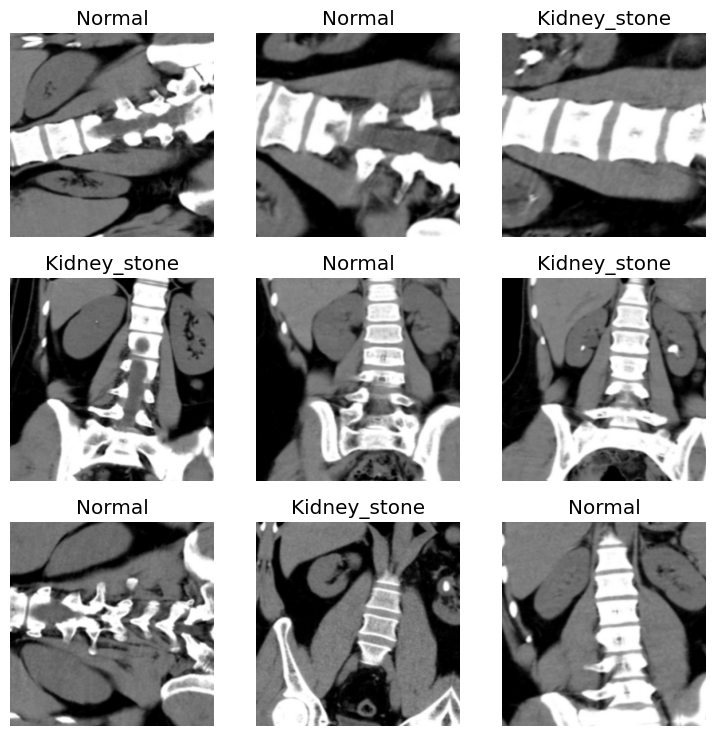

In [ ]:
dls.show_batch()

In [6]:
import torch
from fastai.vision.all import Learner, create_body, create_head, xresnet50
from fastai.vision.all import *
from fastai.vision.all import *
from fastai.vision.all import cnn_learner, resnet34, accuracy

In [ ]:
from fastai import vision

In [ ]:
import torch
import torch.nn as nn



In [ ]:
import torchvision.models as models

In [ ]:
model4 = models.mobilenet_v2

In [ ]:
model = nn.Sequential(create_body(xresnet50(), pretrained=False),create_head(nf=2048, n_out=2)) #xresnet

learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)


In [ ]:
model2 = nn.Sequential(create_body(resnet50(), pretrained=False),create_head(nf=2048, n_out=2)) #resnet

learn2 = Learner(dls, model2, loss_func=CrossEntropyLossFlat(), metrics=accuracy)


In [9]:
model4 = nn.Sequential(  #vgg11
    create_body(models.vgg11_bn(pretrained=False), cut=-1),
    create_head(nf=512, n_out=2)
)
learn4 = Learner(dls, model4, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

In [ ]:
import torch
torch.cuda.empty_cache()

In [10]:
learn4.fit_one_cycle(130,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.454638,0.267168,0.892427,01:20
1,0.244395,0.872381,0.623924,00:57
2,0.222887,0.194297,0.921687,00:56
3,0.180258,0.153484,0.951807,00:56
4,0.186035,0.273235,0.881239,00:56
5,0.183513,0.273151,0.901033,00:56
6,0.182264,0.201301,0.920826,00:56
7,0.172805,0.206835,0.923408,00:56
8,0.168754,0.955911,0.705680,00:57
9,0.169004,0.578367,0.781411,00:56


In [ ]:
learn2.fit_one_cycle(150,1e-2)

In [ ]:
learn.fit_one_cycle(150,1e-2)

In [ ]:
learn.save(path/'kidney-50')

In [ ]:
learn2.save(path/'Resnetkidney-50')

In [12]:
learn4.save(path/'vggkidney-11')

Path('/content/gdrive/MyDrive/combined_dataset/vggkidney-11.pth')

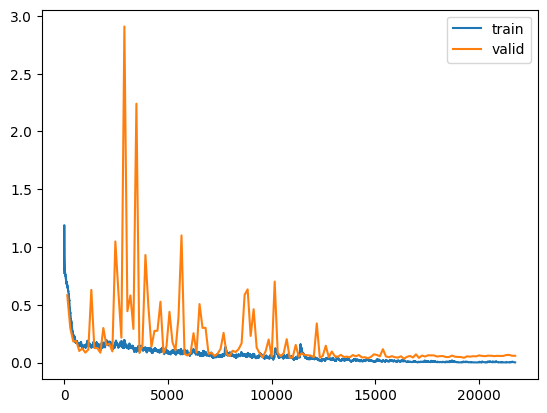

In [ ]:
learn.recorder.plot_loss(skip_start=0, with_valid=True)

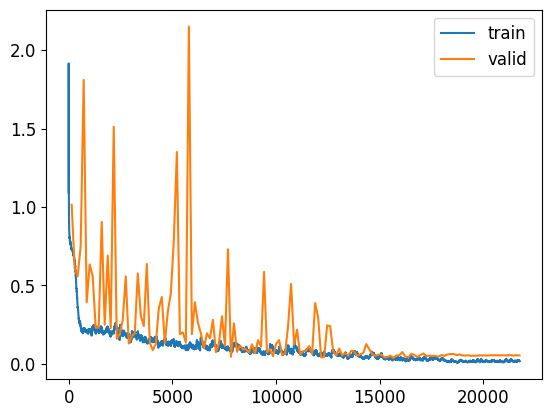

In [ ]:
learn2.recorder.plot_loss(skip_start=0, with_valid=True)

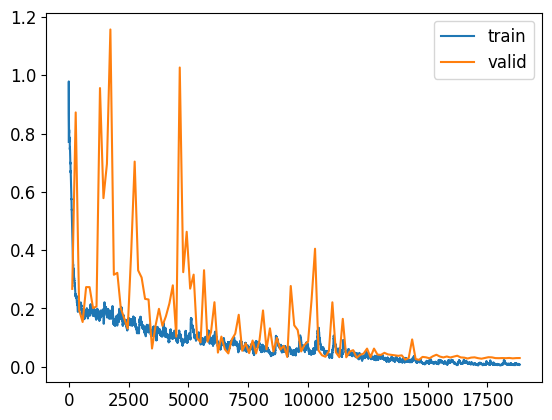

In [13]:
learn4.recorder.plot_loss(skip_start=0, with_valid=True)

In [14]:
all_files= get_image_files(path)

In [15]:
augs = [RandomResizedCropGPU(size=256, min_scale=.9), Rotate(), Zoom()]
dblock = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock),
                   splitter=GrandparentSplitter(train_name='Train', valid_name='Test'),
                   get_y=parent_label,
                   item_tfms=Resize(512, method="squish"),
                   batch_tfms=augs,
                   )

dls_test = dblock.dataloaders(all_files)

In [16]:
print("Number of examples in testing:", len(dls_test.valid_ds))

Number of examples in testing: 1384


In [ ]:
model = nn.Sequential(create_body(xresnet50(), pretrained=False),create_head(nf=2048, n_out=2))

In [ ]:
model2 = nn.Sequential(create_body(resnet50(), pretrained=False),create_head(nf=2048, n_out=2))

In [23]:
model5 = nn.Sequential(create_body(models.vgg11_bn(pretrained=False), pretrained=False),create_head(nf=512, n_out=2))

In [ ]:
learn1 = Learner(dls_test, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy).load('/content/gdrive/MyDrive/combined_dataset/kidney-50')

In [ ]:
learn3 = Learner(dls_test, model2, loss_func=CrossEntropyLossFlat(), metrics=accuracy).load('/content/gdrive/MyDrive/combined_dataset/Resnetkidney-50')

In [24]:
learn5 = Learner(dls_test, model5, loss_func=CrossEntropyLossFlat(), metrics=accuracy).load('/content/gdrive/MyDrive/combined_dataset/vggkidney-11')

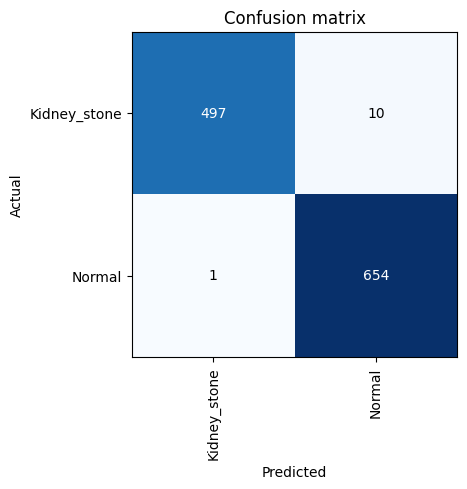

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

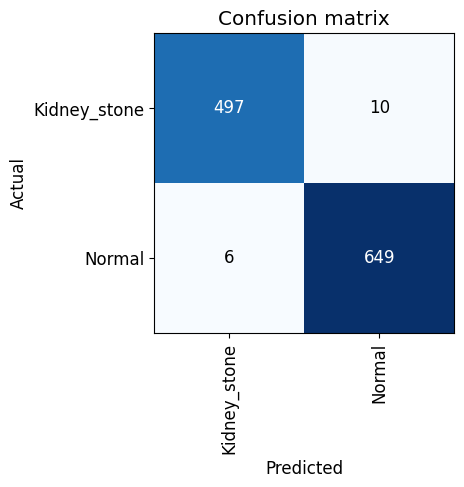

In [ ]:
interp2 = ClassificationInterpretation.from_learner(learn2)
interp2.plot_confusion_matrix()

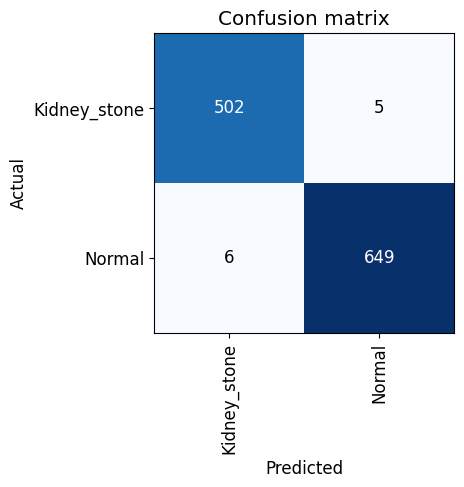

In [27]:
interp4 = ClassificationInterpretation.from_learner(learn4)
interp4.plot_confusion_matrix()

In [28]:
interp4.print_classification_report() #vgg11

              precision    recall  f1-score   support

Kidney_stone       0.99      0.99      0.99       507
      Normal       0.99      0.99      0.99       655

    accuracy                           0.99      1162
   macro avg       0.99      0.99      0.99      1162
weighted avg       0.99      0.99      0.99      1162



In [ ]:
interp2.print_classification_report()#resnet

              precision    recall  f1-score   support

Kidney_stone       0.99      0.98      0.98       507
      Normal       0.98      0.99      0.99       655

    accuracy                           0.99      1162
   macro avg       0.99      0.99      0.99      1162
weighted avg       0.99      0.99      0.99      1162



In [ ]:
interp.print_classification_report() #xresnet

              precision    recall  f1-score   support

Kidney_stone       1.00      0.98      0.99       507
      Normal       0.98      1.00      0.99       655

    accuracy                           0.99      1162
   macro avg       0.99      0.99      0.99      1162
weighted avg       0.99      0.99      0.99      1162



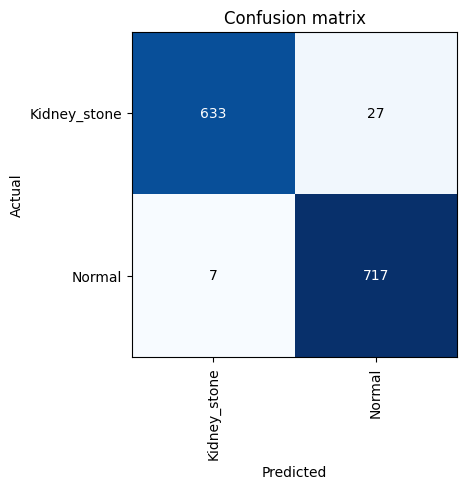

In [ ]:
interp1 = ClassificationInterpretation.from_learner(learn1) #xresnet test
interp1.plot_confusion_matrix()

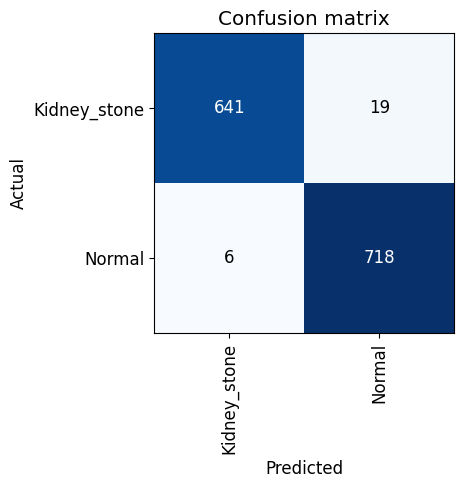

In [ ]:
interp3 = ClassificationInterpretation.from_learner(learn3) #resnet test
interp3.plot_confusion_matrix()

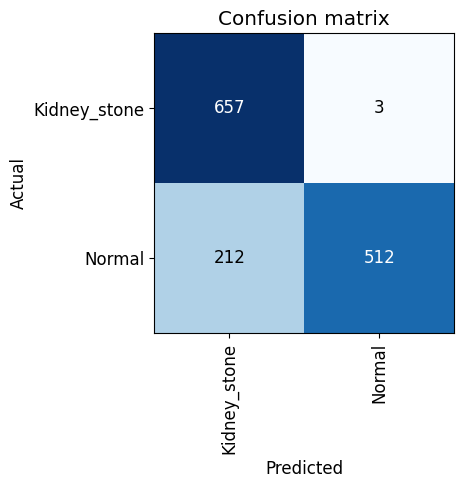

In [31]:
interp5 = ClassificationInterpretation.from_learner(learn5) #vgg11 test
interp5.plot_confusion_matrix()

In [ ]:
interp1.print_classification_report() #xresnet test

              precision    recall  f1-score   support

Kidney_stone       0.99      0.96      0.97       660
      Normal       0.96      0.99      0.98       724

    accuracy                           0.98      1384
   macro avg       0.98      0.97      0.98      1384
weighted avg       0.98      0.98      0.98      1384



In [ ]:
interp3.print_classification_report() #resnet test

              precision    recall  f1-score   support

Kidney_stone       0.99      0.97      0.98       660
      Normal       0.97      0.99      0.98       724

    accuracy                           0.98      1384
   macro avg       0.98      0.98      0.98      1384
weighted avg       0.98      0.98      0.98      1384



In [32]:
interp5.print_classification_report() #vgg11 test

              precision    recall  f1-score   support

Kidney_stone       0.76      1.00      0.86       660
      Normal       0.99      0.71      0.83       724

    accuracy                           0.84      1384
   macro avg       0.88      0.85      0.84      1384
weighted avg       0.88      0.84      0.84      1384

